**Goal:** After looking at 6-day ensembles, it's a bit concerning if HTG has absolutely no impact on days 1 or 2 - the influence should be fairly immediate even in a highly constrained system. So if we have ens members initialized every day in the JJA period, what are the impacts on day 1, day 2, day 3? 

**Date**: 17 Mar 2022


In [1]:
# Load libraries

# # Plotting utils 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import matplotlib.ticker as ticker 
import matplotlib.patches as patches
import matplotlib as matplotlib
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns

# Analysis
import time
import numpy as np 
import xarray as xr
import datetime
from   datetime import date, timedelta
import pandas as pd 
import pickle
import scipy.stats as stats
import glob
import os 

import metpy.calc as mpc
from metpy.units import units
from metpy.plots import Hodograph, SkewT

import warnings
warnings.filterwarnings('ignore')

## Import Ngl with pyn_env active 
# import Ngl



## Read in data that's already been processed 

In [3]:
## Load data rather than re-create (it takes a long time to read it all in) 
saveDir = '/glade/work/mdfowler/CLASP/histData/processedData/ens_byLeadDay/'

hmg_day2_upsample00 = pickle.load( open( saveDir+"realSfc_HMG_day2_30min_pert00.p" , "rb") )
hmg_day3_upsample00 = pickle.load( open( saveDir+"realSfc_HMG_day3_30min_pert00.p" , "rb") )
hmg_day4_upsample00 = pickle.load( open( saveDir+"realSfc_HMG_day4_30min_pert00.p" , "rb") )
hmg_day5_upsample00 = pickle.load( open( saveDir+"realSfc_HMG_day5_30min_pert00.p" , "rb") )
hmg_day6_upsample00 = pickle.load( open( saveDir+"realSfc_HMG_day6_30min_pert00.p" , "rb") )

htg_day2_upsample00 = pickle.load( open( saveDir+"realSfc_HTG_day2_30min_pert00.p" , "rb") )
htg_day3_upsample00 = pickle.load( open( saveDir+"realSfc_HTG_day3_30min_pert00.p" , "rb") )
htg_day4_upsample00 = pickle.load( open( saveDir+"realSfc_HTG_day4_30min_pert00.p" , "rb") )
htg_day5_upsample00 = pickle.load( open( saveDir+"realSfc_HTG_day5_30min_pert00.p" , "rb") )
htg_day6_upsample00 = pickle.load( open( saveDir+"realSfc_HTG_day6_30min_pert00.p" , "rb") )

hmgCLM_day2_upsample00 = pickle.load( open( saveDir+"realSfc_HMGclm_day2_30min_pert00.p" , "rb") )
hmgCLM_day3_upsample00 = pickle.load( open( saveDir+"realSfc_HMGclm_day3_30min_pert00.p" , "rb") )
hmgCLM_day4_upsample00 = pickle.load( open( saveDir+"realSfc_HMGclm_day4_30min_pert00.p" , "rb") )
hmgCLM_day5_upsample00 = pickle.load( open( saveDir+"realSfc_HMGclm_day5_30min_pert00.p" , "rb") )
hmgCLM_day6_upsample00 = pickle.load( open( saveDir+"realSfc_HMGclm_day6_30min_pert00.p" , "rb") )

htgCLM_day2_upsample00 = pickle.load( open( saveDir+"realSfc_HTGclm_day2_30min_pert00.p" , "rb") )
htgCLM_day3_upsample00 = pickle.load( open( saveDir+"realSfc_HTGclm_day3_30min_pert00.p" , "rb") )
htgCLM_day4_upsample00 = pickle.load( open( saveDir+"realSfc_HTGclm_day4_30min_pert00.p" , "rb") )
htgCLM_day5_upsample00 = pickle.load( open( saveDir+"realSfc_HTGclm_day5_30min_pert00.p" , "rb") )
htgCLM_day6_upsample00 = pickle.load( open( saveDir+"realSfc_HTGclm_day6_30min_pert00.p" , "rb") )

print('Read in ens00 data')

hmg_day2_upsample01 = pickle.load( open( saveDir+"realSfc_HMG_day2_30min_pert01.p" , "rb") )
hmg_day3_upsample01 = pickle.load( open( saveDir+"realSfc_HMG_day3_30min_pert01.p" , "rb") )
hmg_day4_upsample01 = pickle.load( open( saveDir+"realSfc_HMG_day4_30min_pert01.p" , "rb") )
hmg_day5_upsample01 = pickle.load( open( saveDir+"realSfc_HMG_day5_30min_pert01.p" , "rb") )
hmg_day6_upsample01 = pickle.load( open( saveDir+"realSfc_HMG_day6_30min_pert01.p" , "rb") )

htg_day2_upsample01 = pickle.load( open( saveDir+"realSfc_HTG_day2_30min_pert01.p" , "rb") )
htg_day3_upsample01 = pickle.load( open( saveDir+"realSfc_HTG_day3_30min_pert01.p" , "rb") )
htg_day4_upsample01 = pickle.load( open( saveDir+"realSfc_HTG_day4_30min_pert01.p" , "rb") )
htg_day5_upsample01 = pickle.load( open( saveDir+"realSfc_HTG_day5_30min_pert01.p" , "rb") )
htg_day6_upsample01 = pickle.load( open( saveDir+"realSfc_HTG_day6_30min_pert01.p" , "rb") )

hmgCLM_day2_upsample01 = pickle.load( open( saveDir+"realSfc_HMGclm_day2_30min_pert01.p" , "rb") )
hmgCLM_day3_upsample01 = pickle.load( open( saveDir+"realSfc_HMGclm_day3_30min_pert01.p" , "rb") )
hmgCLM_day4_upsample01 = pickle.load( open( saveDir+"realSfc_HMGclm_day4_30min_pert01.p" , "rb") )
hmgCLM_day5_upsample01 = pickle.load( open( saveDir+"realSfc_HMGclm_day5_30min_pert01.p" , "rb") )
hmgCLM_day6_upsample01 = pickle.load( open( saveDir+"realSfc_HMGclm_day6_30min_pert01.p" , "rb") )

htgCLM_day2_upsample01 = pickle.load( open( saveDir+"realSfc_HTGclm_day2_30min_pert01.p" , "rb") )
htgCLM_day3_upsample01 = pickle.load( open( saveDir+"realSfc_HTGclm_day3_30min_pert01.p" , "rb") )
htgCLM_day4_upsample01 = pickle.load( open( saveDir+"realSfc_HTGclm_day4_30min_pert01.p" , "rb") )
htgCLM_day5_upsample01 = pickle.load( open( saveDir+"realSfc_HTGclm_day5_30min_pert01.p" , "rb") )
htgCLM_day6_upsample01 = pickle.load( open( saveDir+"realSfc_HTGclm_day6_30min_pert01.p" , "rb") )

print('Read in ens01 data')


Read in ens00 data
Read in ens01 data


In [4]:
## Combine across ensemble members
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
## Step 1: Assign pertlim value as a coordinate 

## Pertlim 00

hmg_day2_upsample00      = hmg_day2_upsample00.assign_coords({"pertlim": 0})
hmg_day3_upsample00      = hmg_day3_upsample00.assign_coords({"pertlim": 0})
hmg_day4_upsample00      = hmg_day4_upsample00.assign_coords({"pertlim": 0})
hmg_day5_upsample00      = hmg_day5_upsample00.assign_coords({"pertlim": 0})
hmg_day6_upsample00      = hmg_day6_upsample00.assign_coords({"pertlim": 0})

htg_day2_upsample00      = htg_day2_upsample00.assign_coords({"pertlim": 0})
htg_day3_upsample00      = htg_day3_upsample00.assign_coords({"pertlim": 0})
htg_day4_upsample00      = htg_day4_upsample00.assign_coords({"pertlim": 0})
htg_day5_upsample00      = htg_day5_upsample00.assign_coords({"pertlim": 0})
htg_day6_upsample00      = htg_day6_upsample00.assign_coords({"pertlim": 0})
   
hmgCLM_day2_upsample00   = hmgCLM_day2_upsample00.assign_coords({"pertlim": 0})
hmgCLM_day3_upsample00   = hmgCLM_day3_upsample00.assign_coords({"pertlim": 0})
hmgCLM_day4_upsample00   = hmgCLM_day4_upsample00.assign_coords({"pertlim": 0})
hmgCLM_day5_upsample00   = hmgCLM_day5_upsample00.assign_coords({"pertlim": 0})
hmgCLM_day6_upsample00   = hmgCLM_day6_upsample00.assign_coords({"pertlim": 0})

htgCLM_day2_upsample00   = htgCLM_day2_upsample00.assign_coords({"pertlim": 0})
htgCLM_day3_upsample00   = htgCLM_day3_upsample00.assign_coords({"pertlim": 0})
htgCLM_day4_upsample00   = htgCLM_day4_upsample00.assign_coords({"pertlim": 0})
htgCLM_day5_upsample00   = htgCLM_day5_upsample00.assign_coords({"pertlim": 0})
htgCLM_day6_upsample00   = htgCLM_day6_upsample00.assign_coords({"pertlim": 0})

## Pertlim 01 

hmg_day2_upsample01      = hmg_day2_upsample01.assign_coords({"pertlim": 1})
hmg_day3_upsample01      = hmg_day3_upsample01.assign_coords({"pertlim": 1})
hmg_day4_upsample01      = hmg_day4_upsample01.assign_coords({"pertlim": 1})
hmg_day5_upsample01      = hmg_day5_upsample01.assign_coords({"pertlim": 1})
hmg_day6_upsample01      = hmg_day6_upsample01.assign_coords({"pertlim": 1})

htg_day2_upsample01      = htg_day2_upsample01.assign_coords({"pertlim": 1})
htg_day3_upsample01      = htg_day3_upsample01.assign_coords({"pertlim": 1})
htg_day4_upsample01      = htg_day4_upsample01.assign_coords({"pertlim": 1})
htg_day5_upsample01      = htg_day5_upsample01.assign_coords({"pertlim": 1})
htg_day6_upsample01      = htg_day6_upsample01.assign_coords({"pertlim": 1})
   
hmgCLM_day2_upsample01   = hmgCLM_day2_upsample01.assign_coords({"pertlim": 1})
hmgCLM_day3_upsample01   = hmgCLM_day3_upsample01.assign_coords({"pertlim": 1})
hmgCLM_day4_upsample01   = hmgCLM_day4_upsample01.assign_coords({"pertlim": 1})
hmgCLM_day5_upsample01   = hmgCLM_day5_upsample01.assign_coords({"pertlim": 1})
hmgCLM_day6_upsample01   = hmgCLM_day6_upsample01.assign_coords({"pertlim": 1})

htgCLM_day2_upsample01   = htgCLM_day2_upsample01.assign_coords({"pertlim": 1})
htgCLM_day3_upsample01   = htgCLM_day3_upsample01.assign_coords({"pertlim": 1})
htgCLM_day4_upsample01   = htgCLM_day4_upsample01.assign_coords({"pertlim": 1})
htgCLM_day5_upsample01   = htgCLM_day5_upsample01.assign_coords({"pertlim": 1})
htgCLM_day6_upsample01   = htgCLM_day6_upsample01.assign_coords({"pertlim": 1})


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
## Step 2: Combine into single arrays by sim day 
hmg_day2_upsample = xr.concat([hmg_day2_upsample00, hmg_day2_upsample01], "pertlim")
hmg_day3_upsample = xr.concat([hmg_day3_upsample00, hmg_day3_upsample01], "pertlim")
hmg_day4_upsample = xr.concat([hmg_day4_upsample00, hmg_day4_upsample01], "pertlim")
hmg_day5_upsample = xr.concat([hmg_day5_upsample00, hmg_day5_upsample01], "pertlim")
hmg_day6_upsample = xr.concat([hmg_day6_upsample00, hmg_day6_upsample01], "pertlim")

htg_day2_upsample = xr.concat([htg_day2_upsample00, htg_day2_upsample01], "pertlim")
htg_day3_upsample = xr.concat([htg_day3_upsample00, htg_day3_upsample01], "pertlim")
htg_day4_upsample = xr.concat([htg_day4_upsample00, htg_day4_upsample01], "pertlim")
htg_day5_upsample = xr.concat([htg_day5_upsample00, htg_day5_upsample01], "pertlim")
htg_day6_upsample = xr.concat([htg_day6_upsample00, htg_day6_upsample01], "pertlim")

hmgCLM_day2_upsample = xr.concat([hmgCLM_day2_upsample00, hmgCLM_day2_upsample01], "pertlim")
hmgCLM_day3_upsample = xr.concat([hmgCLM_day3_upsample00, hmgCLM_day3_upsample01], "pertlim")
hmgCLM_day4_upsample = xr.concat([hmgCLM_day4_upsample00, hmgCLM_day4_upsample01], "pertlim")
hmgCLM_day5_upsample = xr.concat([hmgCLM_day5_upsample00, hmgCLM_day5_upsample01], "pertlim")
hmgCLM_day6_upsample = xr.concat([hmgCLM_day6_upsample00, hmgCLM_day6_upsample01], "pertlim")

htgCLM_day2_upsample = xr.concat([htgCLM_day2_upsample00, htgCLM_day2_upsample01], "pertlim")
htgCLM_day3_upsample = xr.concat([htgCLM_day3_upsample00, htgCLM_day3_upsample01], "pertlim")
htgCLM_day4_upsample = xr.concat([htgCLM_day4_upsample00, htgCLM_day4_upsample01], "pertlim")
htgCLM_day5_upsample = xr.concat([htgCLM_day5_upsample00, htgCLM_day5_upsample01], "pertlim")
htgCLM_day6_upsample = xr.concat([htgCLM_day6_upsample00, htgCLM_day6_upsample01], "pertlim")

print('All pertlim values concatenated')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
## Step 3: Delete excess data 

del hmg_day2_upsample00, hmg_day2_upsample01, htg_day2_upsample00, htg_day2_upsample01
del hmgCLM_day2_upsample00, hmgCLM_day2_upsample01, htgCLM_day2_upsample00, htgCLM_day2_upsample01

del hmg_day3_upsample00, hmg_day3_upsample01, htg_day3_upsample00, htg_day3_upsample01
del hmgCLM_day3_upsample00, hmgCLM_day3_upsample01, htgCLM_day3_upsample00, htgCLM_day3_upsample01

del hmg_day4_upsample00, hmg_day4_upsample01, htg_day4_upsample00, htg_day4_upsample01
del hmgCLM_day4_upsample00, hmgCLM_day4_upsample01, htgCLM_day4_upsample00, htgCLM_day4_upsample01

del hmg_day5_upsample00, hmg_day5_upsample01, htg_day5_upsample00, htg_day5_upsample01
del hmgCLM_day5_upsample00, hmgCLM_day5_upsample01, htgCLM_day5_upsample00, htgCLM_day5_upsample01

del hmg_day6_upsample00, hmg_day6_upsample01, htg_day6_upsample00, htg_day6_upsample01
del hmgCLM_day6_upsample00, hmgCLM_day6_upsample01, htgCLM_day6_upsample00, htgCLM_day6_upsample01



All pertlim values concatenated


In [5]:
# Add month_day index to arrays
month_day_day2                     = pd.MultiIndex.from_arrays([hmg_day2_upsample['time.year'].values,
                                                                hmg_day2_upsample['time.month'].values, 
                                                                hmg_day2_upsample['time.day'].values])
hmg_day2_upsample.coords['year_month_day']      = ('time', month_day_day2)
htg_day2_upsample.coords['year_month_day']      = ('time', month_day_day2)
hmgCLM_day2_upsample.coords['year_month_day']   = ('time', month_day_day2)
htgCLM_day2_upsample.coords['year_month_day']   = ('time', month_day_day2)

month_day_day3                     = pd.MultiIndex.from_arrays([hmg_day3_upsample['time.year'].values,
                                                                hmg_day3_upsample['time.month'].values, 
                                                                hmg_day3_upsample['time.day'].values])
hmg_day3_upsample.coords['year_month_day']      = ('time', month_day_day3)
htg_day3_upsample.coords['year_month_day']      = ('time', month_day_day3)
hmgCLM_day3_upsample.coords['year_month_day']   = ('time', month_day_day3)
htgCLM_day3_upsample.coords['year_month_day']   = ('time', month_day_day3)

month_day_day4                     = pd.MultiIndex.from_arrays([hmg_day4_upsample['time.year'].values,
                                                                hmg_day4_upsample['time.month'].values, 
                                                                hmg_day4_upsample['time.day'].values])
hmg_day4_upsample.coords['year_month_day']      = ('time', month_day_day4)
htg_day4_upsample.coords['year_month_day']      = ('time', month_day_day4)
hmgCLM_day4_upsample.coords['year_month_day']   = ('time', month_day_day4)
htgCLM_day4_upsample.coords['year_month_day']   = ('time', month_day_day4)

month_day_day5                     = pd.MultiIndex.from_arrays([hmg_day5_upsample['time.year'].values,
                                                                hmg_day5_upsample['time.month'].values, 
                                                                hmg_day5_upsample['time.day'].values])
hmg_day5_upsample.coords['year_month_day']      = ('time', month_day_day5)
htg_day5_upsample.coords['year_month_day']      = ('time', month_day_day5)
hmgCLM_day5_upsample.coords['year_month_day']   = ('time', month_day_day5)
htgCLM_day5_upsample.coords['year_month_day']   = ('time', month_day_day5)

month_day_day6                     = pd.MultiIndex.from_arrays([hmg_day6_upsample['time.year'].values,
                                                                hmg_day6_upsample['time.month'].values, 
                                                                hmg_day6_upsample['time.day'].values])
hmg_day6_upsample.coords['year_month_day']      = ('time', month_day_day6)
htg_day6_upsample.coords['year_month_day']      = ('time', month_day_day6)
hmgCLM_day6_upsample.coords['year_month_day']   = ('time', month_day_day6)
htgCLM_day6_upsample.coords['year_month_day']   = ('time', month_day_day6)


In [6]:
## Once you interpolate to any other timestep, it fills in all the months that are missing between JJA's, so need to drop them again

hmg_day2_upsample = hmg_day2_upsample.dropna(dim='time',how='all')
hmg_day3_upsample = hmg_day3_upsample.dropna(dim='time',how='all')
hmg_day4_upsample = hmg_day4_upsample.dropna(dim='time',how='all')
hmg_day5_upsample = hmg_day5_upsample.dropna(dim='time',how='all')
hmg_day6_upsample = hmg_day6_upsample.dropna(dim='time',how='all')

htg_day2_upsample = htg_day2_upsample.dropna(dim='time',how='all')
htg_day3_upsample = htg_day3_upsample.dropna(dim='time',how='all')
htg_day4_upsample = htg_day4_upsample.dropna(dim='time',how='all')
htg_day5_upsample = htg_day5_upsample.dropna(dim='time',how='all')
htg_day6_upsample = htg_day6_upsample.dropna(dim='time',how='all')


In [7]:
hmgCLM_day2_upsample = hmgCLM_day2_upsample.dropna(dim='time',how='all')
hmgCLM_day3_upsample = hmgCLM_day3_upsample.dropna(dim='time',how='all')
hmgCLM_day4_upsample = hmgCLM_day4_upsample.dropna(dim='time',how='all')
hmgCLM_day5_upsample = hmgCLM_day5_upsample.dropna(dim='time',how='all')
hmgCLM_day6_upsample = hmgCLM_day6_upsample.dropna(dim='time',how='all')

htgCLM_day2_upsample = htgCLM_day2_upsample.dropna(dim='time',how='all')
htgCLM_day3_upsample = htgCLM_day3_upsample.dropna(dim='time',how='all')
htgCLM_day4_upsample = htgCLM_day4_upsample.dropna(dim='time',how='all')
htgCLM_day5_upsample = htgCLM_day5_upsample.dropna(dim='time',how='all')
htgCLM_day6_upsample = htgCLM_day6_upsample.dropna(dim='time',how='all')


## Analysis section

*NOTE! Setting the definition of sensitive days based on the sensitivity in pertlim=00 case. Could consider changing this in the future.*


In [8]:
'''
Find all the times in the full array (20m dt) that line up with the day classifications above. 
'''
def getTimes_basedOnDates(fullDS, matchDatesDS):
    iTimes = []
    
    for iTime in range(len(matchDatesDS.year_month_day.values)):
        iKeepTimes = np.where((fullDS['time.year'] ==matchDatesDS.year_month_day_level_0.values[iTime]) &
                              (fullDS['time.month']==matchDatesDS.year_month_day_level_1.values[iTime]) & 
                              (fullDS['time.day']  ==matchDatesDS.year_month_day_level_2.values[iTime]))[0]    
        iTimes = np.append(iTimes, iKeepTimes).astype(int)
    
    # Now select only those times in the local time array
    DS_dayClass = fullDS.isel(time=iTimes)
    
    return(DS_dayClass)

In [9]:
def selSensitiveDays(hmgDS, htgDS, varSel, startHr, endHr): 
    
    print('Working on %s, averaged over hours %i - %i' % (varSel, startHr, endHr))
    
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    
    ## --- Get mean variable (varSel) over selected hours (inclusive from startHr to endHr): 
    if len(np.shape(hmgDS[varSel]))==5:
        if np.shape(hmgDS[varSel])[1]==65:
            real_varHMG = hmgDS[varSel].isel(ilev=-1).sel(pertlim=0)
            real_varHTG = htgDS[varSel].isel(ilev=-1).sel(pertlim=0)
        elif np.shape(hmgDS[varSel])[1]==64:
            real_varHMG = hmgDS[varSel].isel(lev=-1).sel(pertlim=0) 
            real_varHTG = htgDS[varSel].isel(lev=-1).sel(pertlim=0)   
        elif np.shape(hmgDS[varSel])[1]==78:
            real_varHMG = hmgDS[varSel].isel(levInterp=-1).sel(pertlim=0)   
            real_varHTG = htgDS[varSel].isel(levInterp=-1).sel(pertlim=0) 
    else:
        real_varHMG = hmgDS[varSel].sel(pertlim=0)
        real_varHTG = htgDS[varSel].sel(pertlim=0)

    # Select those hours
    iHours_real         = np.where( (real_varHMG['time.hour']>=startHr) & (real_varHMG['time.hour']<=endHr) )[0]
    real_varHMG_selTime = real_varHMG.isel(time=iHours_real)
    real_varHTG_selTime = real_varHTG.isel(time=iHours_real)

    # For each date, get the mean value over the selected time period 
    real_varHMG_dayMean    = real_varHMG_selTime.groupby('year_month_day').mean(dim='time')
    real_varHTG_dayMean    = real_varHTG_selTime.groupby('year_month_day').mean(dim='time')
    
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    
    ## Get list of dates in string form
    strDates = []
    for iDate in range(len(real_varHMG_dayMean.year_month_day.values)):
        yr_sel  = real_varHMG_dayMean.year_month_day_level_0[iDate]
        mon_sel = real_varHMG_dayMean.year_month_day_level_1[iDate]
        day_sel = real_varHMG_dayMean.year_month_day_level_2[iDate]

        strDates = np.append(strDates, datetime.date(yr_sel,mon_sel,day_sel))
        
    # Get year delineation 
    yrStart =[]
    for iDate in range(len(strDates)-1):
        if strDates[iDate].year==(strDates[iDate+1].year)-1:
            yrStart = np.append(yrStart, iDate+1)

    ## - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    
    ## Now get the dates falling within certain percentages 
    diff_realHTG   = np.squeeze(real_varHTG_dayMean.values) - np.squeeze(real_varHMG_dayMean.values)

    highPct = 90
    lowPct  = 10

    print('Real Surface:')
    print('- - - - - - - - ')
    print(highPct,'th percentile difference (HTG): %.3e'  % np.nanpercentile(diff_realHTG, highPct))
    print(lowPct,'th percentile difference (HTG):  %.3e'  % np.nanpercentile(diff_realHTG, lowPct))
    print()
    iHigh_realHTG  = np.where(diff_realHTG   >= np.nanpercentile(diff_realHTG, highPct))[0]
    iLow_realHTG   = np.where(diff_realHTG   <= np.nanpercentile(diff_realHTG, lowPct))[0]


    ## Get indices of dates that are consistent...
    listHigh_real = list(set( iHigh_realHTG )  )
    listLow_real  = list(set( iLow_realHTG ) )

    print('Num days consistent for high percentile (real sfc): ', len(listHigh_real))
    print('Num days consistent for low  percentile (real sfc): ', len(listLow_real))

    
    return real_varHMG_dayMean,real_varHTG_dayMean,strDates,yrStart,listHigh_real,listLow_real

In [11]:
## Select vaiable that's of interest 
varSel  = 'PBLH'
# varSel  = 'PBLdepth'


## This is the option I've been using for the AGU presentation and before that 
startHr = 12
endHr   = 18

print('\n-----------\nDay 2')
selvarHMG_day2,selvarHTG_day2,strDates_day2,yrStart_day2,listHigh_day2,listLow_day2 = selSensitiveDays(hmg_day2_upsample, 
                                                                                                       htg_day2_upsample, 
                                                                                                       varSel, startHr, endHr)
print('\n-----------\nDay 3')
selvarHMG_day3,selvarHTG_day3,strDates_day3,yrStart_day3,listHigh_day3,listLow_day3 = selSensitiveDays(hmg_day3_upsample, 
                                                                                                       htg_day3_upsample, 
                                                                                                       varSel, startHr, endHr)
print('\n-----------\nDay 4')
selvarHMG_day4,selvarHTG_day4,strDates_day4,yrStart_day4,listHigh_day4,listLow_day4 = selSensitiveDays(hmg_day4_upsample, 
                                                                                                       htg_day4_upsample, 
                                                                                                       varSel, startHr, endHr)
print('\n-----------\nDay 5')
selvarHMG_day5,selvarHTG_day5,strDates_day5,yrStart_day5,listHigh_day5,listLow_day5 = selSensitiveDays(hmg_day5_upsample, 
                                                                                                       htg_day5_upsample, 
                                                                                                       varSel, startHr, endHr)
print('\n-----------\nDay 6')
selvarHMG_day6,selvarHTG_day6,strDates_day6,yrStart_day6,listHigh_day6,listLow_day6 = selSensitiveDays(hmg_day6_upsample, 
                                                                                                       htg_day6_upsample, 
                                                                                                       varSel, startHr, endHr)



-----------
Day 2
Working on PBLH, averaged over hours 12 - 18
Real Surface:
- - - - - - - - 
90 th percentile difference (HTG): 3.267e+01
10 th percentile difference (HTG):  -3.097e+01

Num days consistent for high percentile (real sfc):  36
Num days consistent for low  percentile (real sfc):  36

-----------
Day 3
Working on PBLH, averaged over hours 12 - 18
Real Surface:
- - - - - - - - 
90 th percentile difference (HTG): 5.737e+01
10 th percentile difference (HTG):  -6.321e+01

Num days consistent for high percentile (real sfc):  36
Num days consistent for low  percentile (real sfc):  36

-----------
Day 4
Working on PBLH, averaged over hours 12 - 18
Real Surface:
- - - - - - - - 
90 th percentile difference (HTG): 1.022e+02
10 th percentile difference (HTG):  -8.930e+01

Num days consistent for high percentile (real sfc):  36
Num days consistent for low  percentile (real sfc):  36

-----------
Day 5
Working on PBLH, averaged over hours 12 - 18
Real Surface:
- - - - - - - - 
90 th

In [ ]:
# ## Write out dates to a file (to be read into other programs, like CLUBB_Budgets.ipynb)...
# savePath = '/glade/work/mdfowler/CLASP/histData/processedData/ens_byLeadDay/SensitiveDaysToHTG_PBLH_pert00defined_'

# fileName1  = savePath+'_day1.csv'
# df1        = pd.DataFrame({'PBLH+': strDates_day1[np.sort(listHigh_day1)], 
#                            'PBLH-': strDates_day1[np.sort(listLow_day1)]})
# df1.to_csv(fileName1)

# fileName2  = savePath+'_day2.csv'
# df2        = pd.DataFrame({'PBLH+': strDates_day2[np.sort(listHigh_day2)], 
#                            'PBLH-': strDates_day2[np.sort(listLow_day2)]})
# df2.to_csv(fileName2)

# fileName3  = savePath+'_day3.csv'
# df3        = pd.DataFrame({'PBLH+': strDates_day3[np.sort(listHigh_day3)], 
#                            'PBLH-': strDates_day3[np.sort(listLow_day3)]})
# df3.to_csv(fileName3)

# fileName4  = savePath+'_day4.csv'
# df4        = pd.DataFrame({'PBLH+': strDates_day4[np.sort(listHigh_day4)], 
#                            'PBLH-': strDates_day4[np.sort(listLow_day4)]})
# df4.to_csv(fileName4)

# fileName5  = savePath+'_day5.csv'
# df5        = pd.DataFrame({'PBLH+': strDates_day5[np.sort(listHigh_day5)], 
#                            'PBLH-': strDates_day5[np.sort(listLow_day5)]})
# df5.to_csv(fileName5)

# fileName6  = savePath+'_day6.csv'
# df6        = pd.DataFrame({'PBLH+': strDates_day6[np.sort(listHigh_day6)], 
#                            'PBLH-': strDates_day6[np.sort(listLow_day6)]})
# df6.to_csv(fileName6)


### Plot some timeseries comparing 'sensitive' days

In [12]:
def meanVars_overHours(hmgDS, htgDS, plotVar, startHr_plt, endHr_plt):
    
    # Select the variable of interest 
    real_varHMG         = hmgDS[plotVar]
    real_varHTG         = htgDS[plotVar]
    
    # Select hours 
    iHours_real         = np.where( (real_varHMG['time.hour']>=startHr_plt) & (real_varHMG['time.hour']<=endHr_plt) )[0]
    real_varHMG_selTime = real_varHMG.isel(time=iHours_real)
    real_varHTG_selTime = real_varHTG.isel(time=iHours_real)
    
    # For each date, get the mean value over each day
    varHMG_dayMean  = real_varHMG_selTime.groupby('year_month_day').mean(dim='time')
    varHTG_dayMean  = real_varHTG_selTime.groupby('year_month_day').mean(dim='time')
    diffHTG_dayMean = varHTG_dayMean - varHMG_dayMean


    return varHMG_dayMean, varHTG_dayMean, diffHTG_dayMean


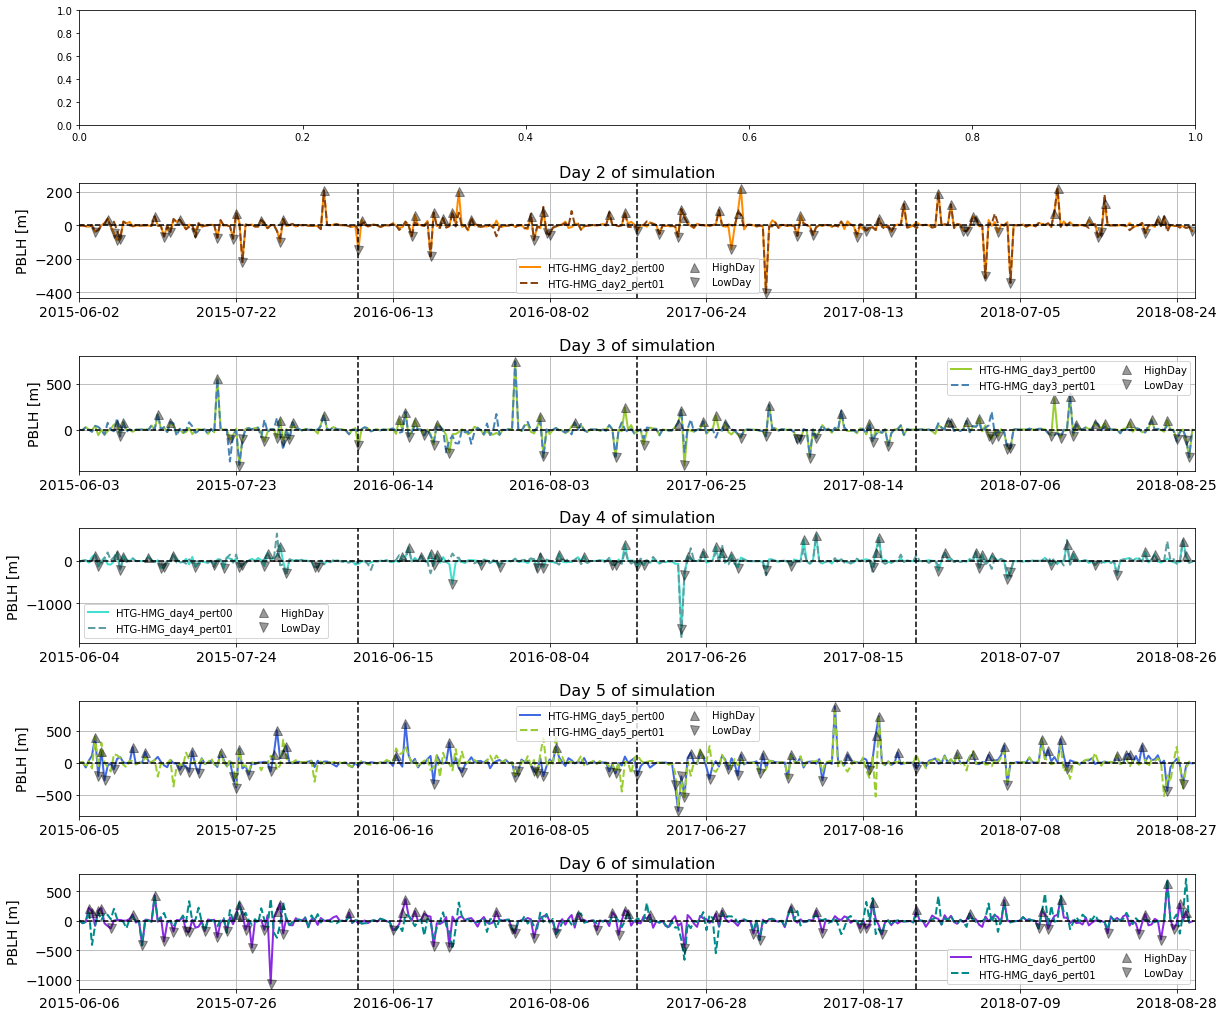

In [16]:
# Plot afternoon means of a selected variable 

plotVar = 'PBLH'
unitsStr = 'PBLH [m]'

# plotVar = 'PBLdepth'
# unitsStr = 'PBLdepth [m]'

# plotVar = 'PBLdepth_Q'
# unitsStr = 'PBLdepth_Q [m]'

# plotVar = 'PRECT'
# unitsStr = 'PRECT [m/s]'

# plotVar = 'SHFLX'
# unitsStr = 'SHFLX [W/m2]'

startHr_plt = 12
endHr_plt   = 18

## To start: compute average over selected hours for each day lead time
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
real_varHMG_day2,real_varHTG_day2,diffHTG_day2 = meanVars_overHours(hmg_day2_upsample, 
                                                                    htg_day2_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day3,real_varHTG_day3,diffHTG_day3 = meanVars_overHours(hmg_day3_upsample, 
                                                                    htg_day3_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day4,real_varHTG_day4,diffHTG_day4 = meanVars_overHours(hmg_day4_upsample, 
                                                                    htg_day4_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day5,real_varHTG_day5,diffHTG_day5 = meanVars_overHours(hmg_day5_upsample, 
                                                                    htg_day5_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day6,real_varHTG_day6,diffHTG_day6 = meanVars_overHours(hmg_day6_upsample, 
                                                                    htg_day6_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## Set up plotting options 
plotHMG  = False
plotHTG  = False
plotDiff = True

startDate = datetime.date(2015,6,1)
endDate   = datetime.date(2015,9,1)

fig,axs = plt.subplots(6,1, figsize=(20,18))
axs     = axs.ravel()
fig.subplots_adjust(hspace=0.5)

if plotHMG==True:
    axs[1].plot(strDates_day2,np.squeeze(real_varHMG_day2.sel(pertlim=0)), color='darkorange', alpha=0.7,label='HMG_day2_pert00')
    axs[2].plot(strDates_day3,np.squeeze(real_varHMG_day3.sel(pertlim=0)), color='olivedrab',  alpha=0.7,label='HMG_day3_pert00')
    axs[3].plot(strDates_day4,np.squeeze(real_varHMG_day4.sel(pertlim=0)), color='turquoise',  alpha=0.7,label='HMG_day4_pert00')
    axs[4].plot(strDates_day5,np.squeeze(real_varHMG_day5.sel(pertlim=0)), color='royalblue',  alpha=0.7,label='HMG_day5_pert00')
    axs[5].plot(strDates_day6,np.squeeze(real_varHMG_day6.sel(pertlim=0)), color='blueviolet', alpha=0.7,label='HMG_day6_pert00')
    
    axs[1].plot(strDates_day2,np.squeeze(real_varHMG_day2.sel(pertlim=1)), color='saddlebrown',      alpha=0.7,label='HMG_day2_pert01')
    axs[2].plot(strDates_day3,np.squeeze(real_varHMG_day3.sel(pertlim=1)), color='springgreen',      alpha=0.7,label='HMG_day3_pert01')
    axs[3].plot(strDates_day4,np.squeeze(real_varHMG_day4.sel(pertlim=1)), color='cadetblue',        alpha=0.7,label='HMG_day4_pert01')
    axs[4].plot(strDates_day5,np.squeeze(real_varHMG_day5.sel(pertlim=1)), color='yellowgreen',  alpha=0.7,label='HMG_day5_pert01')
    axs[5].plot(strDates_day6,np.squeeze(real_varHMG_day6.sel(pertlim=1)), color='darkcyan',      alpha=0.7,label='HMG_day6_pert01')
    
if plotHTG==True:
    axs[1].plot(strDates_day2,np.squeeze(real_varHTG_day2.sel(pertlim=0)),'--', color='darkorange', label='HTG_day2_pert00')
    axs[2].plot(strDates_day3,np.squeeze(real_varHTG_day3.sel(pertlim=0)),'--', color='olivedrab',  label='HTG_day3_pert00')
    axs[3].plot(strDates_day4,np.squeeze(real_varHTG_day4.sel(pertlim=0)),'--', color='turquoise',  label='HTG_day4_pert00')
    axs[4].plot(strDates_day5,np.squeeze(real_varHTG_day5.sel(pertlim=0)),'--', color='royalblue',  label='HTG_day5_pert00')
    axs[5].plot(strDates_day6,np.squeeze(real_varHTG_day6.sel(pertlim=0)),'--', color='blueviolet', label='HTG_day6_pert00')
    
    axs[1].plot(strDates_day2,np.squeeze(real_varHTG_day2.sel(pertlim=1)),'--', color='saddlebrown',       label='HTG_day2_pert01')
    axs[2].plot(strDates_day3,np.squeeze(real_varHTG_day3.sel(pertlim=1)),'--', color='springgreen',        label='HTG_day3_pert01')
    axs[3].plot(strDates_day4,np.squeeze(real_varHTG_day4.sel(pertlim=1)),'--', color='cadetblue',        label='HTG_day4_pert01')
    axs[4].plot(strDates_day5,np.squeeze(real_varHTG_day5.sel(pertlim=1)),'--', color='yellowgreen',  label='HTG_day5_pert01')
    axs[5].plot(strDates_day6,np.squeeze(real_varHTG_day6.sel(pertlim=1)),'--', color='darkcyan',      label='HTG_day6_pert01')
    
if plotDiff==True:   
    axs[1].plot(np.arange(len(strDates_day2)),np.squeeze(diffHTG_day2.sel(pertlim=0)), color='darkorange', linewidth=2,label='HTG-HMG_day2_pert00')
    axs[2].plot(np.arange(len(strDates_day3)),np.squeeze(diffHTG_day3.sel(pertlim=0)), color='yellowgreen',  linewidth=2,label='HTG-HMG_day3_pert00')
    axs[3].plot(np.arange(len(strDates_day4)),np.squeeze(diffHTG_day4.sel(pertlim=0)), color='turquoise',  linewidth=2,label='HTG-HMG_day4_pert00')
    axs[4].plot(np.arange(len(strDates_day5)),np.squeeze(diffHTG_day5.sel(pertlim=0)), color='royalblue',  linewidth=2,label='HTG-HMG_day5_pert00')
    axs[5].plot(np.arange(len(strDates_day6)),np.squeeze(diffHTG_day6.sel(pertlim=0)), color='blueviolet', linewidth=2,label='HTG-HMG_day6_pert00')
    
    axs[1].plot(np.arange(len(strDates_day2)),np.squeeze(diffHTG_day2.sel(pertlim=1)),'--', color='saddlebrown', linewidth=2,label='HTG-HMG_day2_pert01')
    axs[2].plot(np.arange(len(strDates_day3)),np.squeeze(diffHTG_day3.sel(pertlim=1)),'--', color='steelblue',  linewidth=2,label='HTG-HMG_day3_pert01')
    axs[3].plot(np.arange(len(strDates_day4)),np.squeeze(diffHTG_day4.sel(pertlim=1)),'--', color='cadetblue',  linewidth=2,label='HTG-HMG_day4_pert01')
    axs[4].plot(np.arange(len(strDates_day5)),np.squeeze(diffHTG_day5.sel(pertlim=1)),'--', color='yellowgreen', linewidth=2, label='HTG-HMG_day5_pert01')
    axs[5].plot(np.arange(len(strDates_day6)),np.squeeze(diffHTG_day6.sel(pertlim=1)),'--', color='darkcyan',linewidth=2, label='HTG-HMG_day6_pert01')

## Add indicators of positive/negative sensitivity day 
if plotDiff==True: 
    axs[1].plot(np.arange(len(strDates_day2))[listHigh_day2], np.squeeze(diffHTG_day2.sel(pertlim=0))[listHigh_day2],'k^',markersize=9,alpha=0.4, label='HighDay')
    axs[2].plot(np.arange(len(strDates_day3))[listHigh_day3], np.squeeze(diffHTG_day3.sel(pertlim=0))[listHigh_day3],'k^',markersize=9,alpha=0.4, label='HighDay')
    axs[3].plot(np.arange(len(strDates_day4))[listHigh_day4], np.squeeze(diffHTG_day4.sel(pertlim=0))[listHigh_day4],'k^',markersize=9,alpha=0.4, label='HighDay')
    axs[4].plot(np.arange(len(strDates_day5))[listHigh_day5], np.squeeze(diffHTG_day5.sel(pertlim=0))[listHigh_day5],'k^',markersize=9,alpha=0.4, label='HighDay')
    axs[5].plot(np.arange(len(strDates_day6))[listHigh_day6], np.squeeze(diffHTG_day6.sel(pertlim=0))[listHigh_day6],'k^',markersize=9,alpha=0.4, label='HighDay')

    axs[1].plot(np.arange(len(strDates_day2))[listLow_day2], np.squeeze(diffHTG_day2.sel(pertlim=0))[listLow_day2],'kv',markersize=9,alpha=0.4, label='LowDay')
    axs[2].plot(np.arange(len(strDates_day3))[listLow_day3], np.squeeze(diffHTG_day3.sel(pertlim=0))[listLow_day3],'kv',markersize=9,alpha=0.4, label='LowDay')
    axs[3].plot(np.arange(len(strDates_day4))[listLow_day4], np.squeeze(diffHTG_day4.sel(pertlim=0))[listLow_day4],'kv',markersize=9,alpha=0.4, label='LowDay')
    axs[4].plot(np.arange(len(strDates_day5))[listLow_day5], np.squeeze(diffHTG_day5.sel(pertlim=0))[listLow_day5],'kv',markersize=9,alpha=0.4, label='LowDay')
    axs[5].plot(np.arange(len(strDates_day6))[listLow_day6], np.squeeze(diffHTG_day6.sel(pertlim=0))[listLow_day6],'kv',markersize=9,alpha=0.4, label='LowDay')

## Control how plots display (ticks, labels, etc)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## Add legends
axs[1].legend(ncol=2)
axs[2].legend(ncol=2)
axs[3].legend(ncol=2)
axs[4].legend(ncol=2)
axs[5].legend(ncol=2)

## Labels and Titles 
axs[1].set_title('Day 2 of simulation', fontsize=16)
axs[2].set_title('Day 3 of simulation', fontsize=16)
axs[3].set_title('Day 4 of simulation', fontsize=16)
axs[4].set_title('Day 5 of simulation', fontsize=16)
axs[5].set_title('Day 6 of simulation', fontsize=16)

axs[1].set_ylabel(unitsStr, fontsize=14)
axs[2].set_ylabel(unitsStr, fontsize=14)
axs[3].set_ylabel(unitsStr, fontsize=14)
axs[4].set_ylabel(unitsStr, fontsize=14)
axs[5].set_ylabel(unitsStr, fontsize=14)

## Limits on axes and tick labels 
axs[1].set_xlim([0, len(strDates_day2)])
axs[2].set_xlim([0, len(strDates_day3)])
axs[3].set_xlim([0, len(strDates_day4)])
axs[4].set_xlim([0, len(strDates_day5)])
axs[5].set_xlim([0, len(strDates_day6)])

 # Control tick labels
xTicks       = axs[1].get_xticks()
dates_xticks = strDates_day2[xTicks.astype(int)[:-1]]
axs[1].set_xticklabels(dates_xticks)
for iYr in range(len(yrStart_day2)):
        axs[1].axvline(yrStart_day2[iYr], color='k',linestyle='--')
        
xTicks       = axs[2].get_xticks()
dates_xticks = strDates_day3[xTicks.astype(int)[:-1]]
axs[2].set_xticklabels(dates_xticks)
for iYr in range(len(yrStart_day3)):
        axs[2].axvline(yrStart_day3[iYr], color='k',linestyle='--')
        
xTicks       = axs[3].get_xticks()
dates_xticks = strDates_day4[xTicks.astype(int)[:-1]]
axs[3].set_xticklabels(dates_xticks)
for iYr in range(len(yrStart_day4)):
        axs[3].axvline(yrStart_day4[iYr], color='k',linestyle='--')

xTicks       = axs[4].get_xticks()
dates_xticks = strDates_day5[xTicks.astype(int)[:-1]]
axs[4].set_xticklabels(dates_xticks)
for iYr in range(len(yrStart_day5)):
        axs[4].axvline(yrStart_day5[iYr], color='k',linestyle='--')

xTicks       = axs[5].get_xticks()
dates_xticks = strDates_day6[xTicks.astype(int)[:-1]]
axs[5].set_xticklabels(dates_xticks)
for iYr in range(len(yrStart_day6)):
        axs[5].axvline(yrStart_day6[iYr], color='k',linestyle='--')

axs[1].tick_params(axis='both', labelsize= 14)
axs[2].tick_params(axis='both', labelsize= 14)
axs[3].tick_params(axis='both', labelsize= 14)
axs[4].tick_params(axis='both', labelsize= 14)
axs[5].tick_params(axis='both', labelsize= 14)

if plotDiff==True:
    axs[1].axhline(0,color='k',linestyle='--')
    axs[2].axhline(0,color='k',linestyle='--')
    axs[3].axhline(0,color='k',linestyle='--')
    axs[4].axhline(0,color='k',linestyle='--')
    axs[5].axhline(0,color='k',linestyle='--')
    
    axs[1].grid()
    axs[2].grid()
    axs[3].grid()
    axs[4].grid()
    axs[5].grid()
    
# fig.delaxes([0])
    
plt.show()


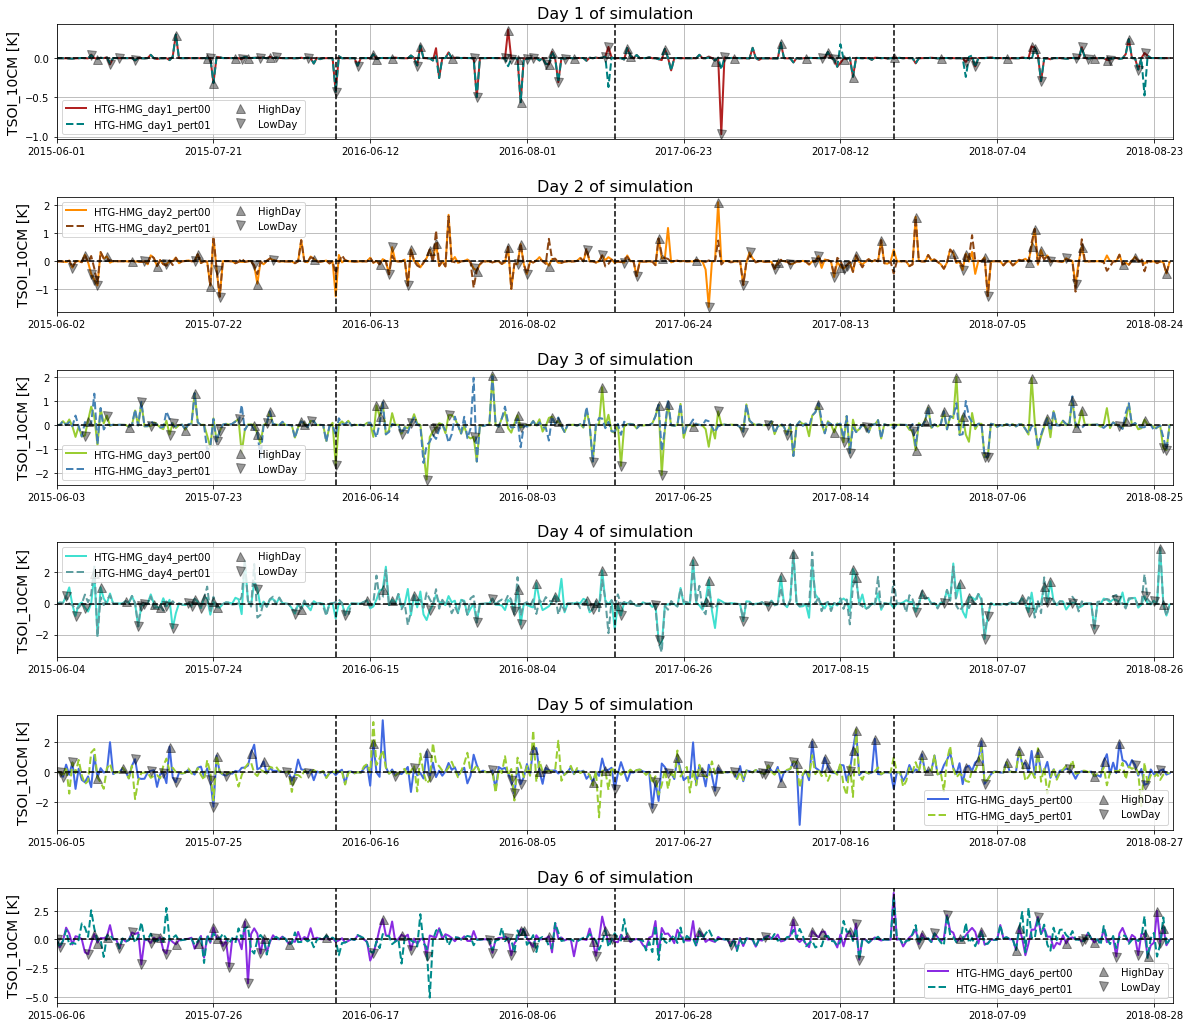

In [12]:
# Plot afternoon means of a selected variable 

# plotVar = 'SOILWATER_10CM'
# unitsStr = 'SOILWATER_10CM [kg/m2]'

plotVar = 'TSOI_10CM'
unitsStr = 'TSOI_10CM [K]'

startHr_plt = 12
endHr_plt   = 18


## To start: compute average over selected hours for each day lead time
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

real_varHMG_day1,real_varHTG_day1,diffHTG_day1 = meanVars_overHours(hmgCLM_day1_upsample, 
                                                                    htgCLM_day1_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day2,real_varHTG_day2,diffHTG_day2 = meanVars_overHours(hmgCLM_day2_upsample, 
                                                                    htgCLM_day2_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day3,real_varHTG_day3,diffHTG_day3 = meanVars_overHours(hmgCLM_day3_upsample, 
                                                                    htgCLM_day3_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day4,real_varHTG_day4,diffHTG_day4 = meanVars_overHours(hmgCLM_day4_upsample, 
                                                                    htgCLM_day4_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day5,real_varHTG_day5,diffHTG_day5 = meanVars_overHours(hmgCLM_day5_upsample, 
                                                                    htgCLM_day5_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day6,real_varHTG_day6,diffHTG_day6 = meanVars_overHours(hmgCLM_day6_upsample, 
                                                                    htgCLM_day6_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## Set up plotting options 
plotHMG  = False
plotHTG  = False
plotDiff = True

startDate = datetime.date(2015,6,1)
endDate   = datetime.date(2015,9,1)

fig,axs = plt.subplots(6,1, figsize=(20,18))
axs     = axs.ravel()
fig.subplots_adjust(hspace=0.5)

if plotHMG==True:
    axs[0].plot(strDates_day1,np.squeeze(real_varHMG_day1.sel(pertlim=0)), color='firebrick',  alpha=0.7,label='HMG_day1_pert00')
    axs[1].plot(strDates_day2,np.squeeze(real_varHMG_day2.sel(pertlim=0)), color='darkorange', alpha=0.7,label='HMG_day2_pert00')
    axs[2].plot(strDates_day3,np.squeeze(real_varHMG_day3.sel(pertlim=0)), color='olivedrab',  alpha=0.7,label='HMG_day3_pert00')
    axs[3].plot(strDates_day4,np.squeeze(real_varHMG_day4.sel(pertlim=0)), color='turquoise',  alpha=0.7,label='HMG_day4_pert00')
    axs[4].plot(strDates_day5,np.squeeze(real_varHMG_day5.sel(pertlim=0)), color='royalblue',  alpha=0.7,label='HMG_day5_pert00')
    axs[5].plot(strDates_day6,np.squeeze(real_varHMG_day6.sel(pertlim=0)), color='blueviolet', alpha=0.7,label='HMG_day6_pert00')
    
    axs[0].plot(strDates_day1,np.squeeze(real_varHMG_day1.sel(pertlim=1)), color='teal',       alpha=0.7,label='HMG_day1_pert01')
    axs[1].plot(strDates_day2,np.squeeze(real_varHMG_day2.sel(pertlim=1)), color='saddlebrown',      alpha=0.7,label='HMG_day2_pert01')
    axs[2].plot(strDates_day3,np.squeeze(real_varHMG_day3.sel(pertlim=1)), color='springgreen',      alpha=0.7,label='HMG_day3_pert01')
    axs[3].plot(strDates_day4,np.squeeze(real_varHMG_day4.sel(pertlim=1)), color='cadetblue',        alpha=0.7,label='HMG_day4_pert01')
    axs[4].plot(strDates_day5,np.squeeze(real_varHMG_day5.sel(pertlim=1)), color='yellowgreen',  alpha=0.7,label='HMG_day5_pert01')
    axs[5].plot(strDates_day6,np.squeeze(real_varHMG_day6.sel(pertlim=1)), color='darkcyan',      alpha=0.7,label='HMG_day6_pert01')
    
if plotHTG==True:
    axs[0].plot(strDates_day1,np.squeeze(real_varHTG_day1.sel(pertlim=0)),'--', color='firebrick',  label='HTG_day1_pert00')
    axs[1].plot(strDates_day2,np.squeeze(real_varHTG_day2.sel(pertlim=0)),'--', color='darkorange', label='HTG_day2_pert00')
    axs[2].plot(strDates_day3,np.squeeze(real_varHTG_day3.sel(pertlim=0)),'--', color='olivedrab',  label='HTG_day3_pert00')
    axs[3].plot(strDates_day4,np.squeeze(real_varHTG_day4.sel(pertlim=0)),'--', color='turquoise',  label='HTG_day4_pert00')
    axs[4].plot(strDates_day5,np.squeeze(real_varHTG_day5.sel(pertlim=0)),'--', color='royalblue',  label='HTG_day5_pert00')
    axs[5].plot(strDates_day6,np.squeeze(real_varHTG_day6.sel(pertlim=0)),'--', color='blueviolet', label='HTG_day6_pert00')
    
    axs[0].plot(strDates_day1,np.squeeze(real_varHTG_day1.sel(pertlim=1)),'--', color='teal',              label='HTG_day1_pert01')
    axs[1].plot(strDates_day2,np.squeeze(real_varHTG_day2.sel(pertlim=1)),'--', color='saddlebrown',       label='HTG_day2_pert01')
    axs[2].plot(strDates_day3,np.squeeze(real_varHTG_day3.sel(pertlim=1)),'--', color='springgreen',        label='HTG_day3_pert01')
    axs[3].plot(strDates_day4,np.squeeze(real_varHTG_day4.sel(pertlim=1)),'--', color='cadetblue',        label='HTG_day4_pert01')
    axs[4].plot(strDates_day5,np.squeeze(real_varHTG_day5.sel(pertlim=1)),'--', color='yellowgreen',  label='HTG_day5_pert01')
    axs[5].plot(strDates_day6,np.squeeze(real_varHTG_day6.sel(pertlim=1)),'--', color='darkcyan',      label='HTG_day6_pert01')
    
if plotDiff==True:   
    axs[0].plot(np.arange(len(strDates_day1)),np.squeeze(diffHTG_day1.sel(pertlim=0)), color='firebrick', linewidth=2,  label='HTG-HMG_day1_pert00')
    axs[1].plot(np.arange(len(strDates_day2)),np.squeeze(diffHTG_day2.sel(pertlim=0)), color='darkorange', linewidth=2,label='HTG-HMG_day2_pert00')
    axs[2].plot(np.arange(len(strDates_day3)),np.squeeze(diffHTG_day3.sel(pertlim=0)), color='yellowgreen',  linewidth=2,label='HTG-HMG_day3_pert00')
    axs[3].plot(np.arange(len(strDates_day4)),np.squeeze(diffHTG_day4.sel(pertlim=0)), color='turquoise',  linewidth=2,label='HTG-HMG_day4_pert00')
    axs[4].plot(np.arange(len(strDates_day5)),np.squeeze(diffHTG_day5.sel(pertlim=0)), color='royalblue',  linewidth=2,label='HTG-HMG_day5_pert00')
    axs[5].plot(np.arange(len(strDates_day6)),np.squeeze(diffHTG_day6.sel(pertlim=0)), color='blueviolet', linewidth=2,label='HTG-HMG_day6_pert00')
    
    axs[0].plot(np.arange(len(strDates_day1)),np.squeeze(diffHTG_day1.sel(pertlim=1)),'--', color='teal',  linewidth=2,label='HTG-HMG_day1_pert01')
    axs[1].plot(np.arange(len(strDates_day2)),np.squeeze(diffHTG_day2.sel(pertlim=1)),'--', color='saddlebrown', linewidth=2,label='HTG-HMG_day2_pert01')
    axs[2].plot(np.arange(len(strDates_day3)),np.squeeze(diffHTG_day3.sel(pertlim=1)),'--', color='steelblue',  linewidth=2,label='HTG-HMG_day3_pert01')
    axs[3].plot(np.arange(len(strDates_day4)),np.squeeze(diffHTG_day4.sel(pertlim=1)),'--', color='cadetblue',  linewidth=2,label='HTG-HMG_day4_pert01')
    axs[4].plot(np.arange(len(strDates_day5)),np.squeeze(diffHTG_day5.sel(pertlim=1)),'--', color='yellowgreen', linewidth=2, label='HTG-HMG_day5_pert01')
    axs[5].plot(np.arange(len(strDates_day6)),np.squeeze(diffHTG_day6.sel(pertlim=1)),'--', color='darkcyan',linewidth=2, label='HTG-HMG_day6_pert01')

## Add indicators of positive/negative sensitivity day 
if plotDiff==True: 
    axs[0].plot(np.arange(len(strDates_day1))[listHigh_day1], np.squeeze(diffHTG_day1.sel(pertlim=0))[listHigh_day1],'k^',markersize=9,alpha=0.4, label='HighDay')
    axs[1].plot(np.arange(len(strDates_day2))[listHigh_day2], np.squeeze(diffHTG_day2.sel(pertlim=0))[listHigh_day2],'k^',markersize=9,alpha=0.4, label='HighDay')
    axs[2].plot(np.arange(len(strDates_day3))[listHigh_day3], np.squeeze(diffHTG_day3.sel(pertlim=0))[listHigh_day3],'k^',markersize=9,alpha=0.4, label='HighDay')
    axs[3].plot(np.arange(len(strDates_day4))[listHigh_day4], np.squeeze(diffHTG_day4.sel(pertlim=0))[listHigh_day4],'k^',markersize=9,alpha=0.4, label='HighDay')
    axs[4].plot(np.arange(len(strDates_day5))[listHigh_day5], np.squeeze(diffHTG_day5.sel(pertlim=0))[listHigh_day5],'k^',markersize=9,alpha=0.4, label='HighDay')
    axs[5].plot(np.arange(len(strDates_day6))[listHigh_day6], np.squeeze(diffHTG_day6.sel(pertlim=0))[listHigh_day6],'k^',markersize=9,alpha=0.4, label='HighDay')

    axs[0].plot(np.arange(len(strDates_day1))[listLow_day1], np.squeeze(diffHTG_day1.sel(pertlim=0))[listLow_day1],'kv',markersize=9,alpha=0.4, label='LowDay')
    axs[1].plot(np.arange(len(strDates_day2))[listLow_day2], np.squeeze(diffHTG_day2.sel(pertlim=0))[listLow_day2],'kv',markersize=9,alpha=0.4, label='LowDay')
    axs[2].plot(np.arange(len(strDates_day3))[listLow_day3], np.squeeze(diffHTG_day3.sel(pertlim=0))[listLow_day3],'kv',markersize=9,alpha=0.4, label='LowDay')
    axs[3].plot(np.arange(len(strDates_day4))[listLow_day4], np.squeeze(diffHTG_day4.sel(pertlim=0))[listLow_day4],'kv',markersize=9,alpha=0.4, label='LowDay')
    axs[4].plot(np.arange(len(strDates_day5))[listLow_day5], np.squeeze(diffHTG_day5.sel(pertlim=0))[listLow_day5],'kv',markersize=9,alpha=0.4, label='LowDay')
    axs[5].plot(np.arange(len(strDates_day6))[listLow_day6], np.squeeze(diffHTG_day6.sel(pertlim=0))[listLow_day6],'kv',markersize=9,alpha=0.4, label='LowDay')

## Control how plots display (ticks, labels, etc)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## Add legends
axs[0].legend(ncol=2)
axs[1].legend(ncol=2)
axs[2].legend(ncol=2)
axs[3].legend(ncol=2)
axs[4].legend(ncol=2)
axs[5].legend(ncol=2)

## Labels and Titles 
axs[0].set_title('Day 1 of simulation', fontsize=16)
axs[1].set_title('Day 2 of simulation', fontsize=16)
axs[2].set_title('Day 3 of simulation', fontsize=16)
axs[3].set_title('Day 4 of simulation', fontsize=16)
axs[4].set_title('Day 5 of simulation', fontsize=16)
axs[5].set_title('Day 6 of simulation', fontsize=16)

axs[0].set_ylabel(unitsStr, fontsize=14)
axs[1].set_ylabel(unitsStr, fontsize=14)
axs[2].set_ylabel(unitsStr, fontsize=14)
axs[3].set_ylabel(unitsStr, fontsize=14)
axs[4].set_ylabel(unitsStr, fontsize=14)
axs[5].set_ylabel(unitsStr, fontsize=14)

## Limits on axes and tick labels 
axs[0].set_xlim([0, len(strDates_day1)])
axs[1].set_xlim([0, len(strDates_day2)])
axs[2].set_xlim([0, len(strDates_day3)])
axs[3].set_xlim([0, len(strDates_day4)])
axs[4].set_xlim([0, len(strDates_day5)])
axs[5].set_xlim([0, len(strDates_day6)])

 # Control tick labels
xTicks       = axs[0].get_xticks()
dates_xticks = strDates_day1[xTicks.astype(int)[:-1]]
axs[0].set_xticklabels(dates_xticks)
for iYr in range(len(yrStart_day1)):
        axs[0].axvline(yrStart_day1[iYr], color='k',linestyle='--')

xTicks       = axs[1].get_xticks()
dates_xticks = strDates_day2[xTicks.astype(int)[:-1]]
axs[1].set_xticklabels(dates_xticks)
for iYr in range(len(yrStart_day2)):
        axs[1].axvline(yrStart_day2[iYr], color='k',linestyle='--')
        
xTicks       = axs[2].get_xticks()
dates_xticks = strDates_day3[xTicks.astype(int)[:-1]]
axs[2].set_xticklabels(dates_xticks)
for iYr in range(len(yrStart_day3)):
        axs[2].axvline(yrStart_day3[iYr], color='k',linestyle='--')
        
xTicks       = axs[3].get_xticks()
dates_xticks = strDates_day4[xTicks.astype(int)[:-1]]
axs[3].set_xticklabels(dates_xticks)
for iYr in range(len(yrStart_day4)):
        axs[3].axvline(yrStart_day4[iYr], color='k',linestyle='--')

xTicks       = axs[4].get_xticks()
dates_xticks = strDates_day5[xTicks.astype(int)[:-1]]
axs[4].set_xticklabels(dates_xticks)
for iYr in range(len(yrStart_day5)):
        axs[4].axvline(yrStart_day5[iYr], color='k',linestyle='--')

xTicks       = axs[5].get_xticks()
dates_xticks = strDates_day6[xTicks.astype(int)[:-1]]
axs[5].set_xticklabels(dates_xticks)
for iYr in range(len(yrStart_day6)):
        axs[5].axvline(yrStart_day6[iYr], color='k',linestyle='--')



if plotDiff==True:
    axs[0].axhline(0,color='k',linestyle='--')
    axs[1].axhline(0,color='k',linestyle='--')
    axs[2].axhline(0,color='k',linestyle='--')
    axs[3].axhline(0,color='k',linestyle='--')
    axs[4].axhline(0,color='k',linestyle='--')
    axs[5].axhline(0,color='k',linestyle='--')
    
    axs[0].grid()
    axs[1].grid()
    axs[2].grid()
    axs[3].grid()
    axs[4].grid()
    axs[5].grid()

plt.show()


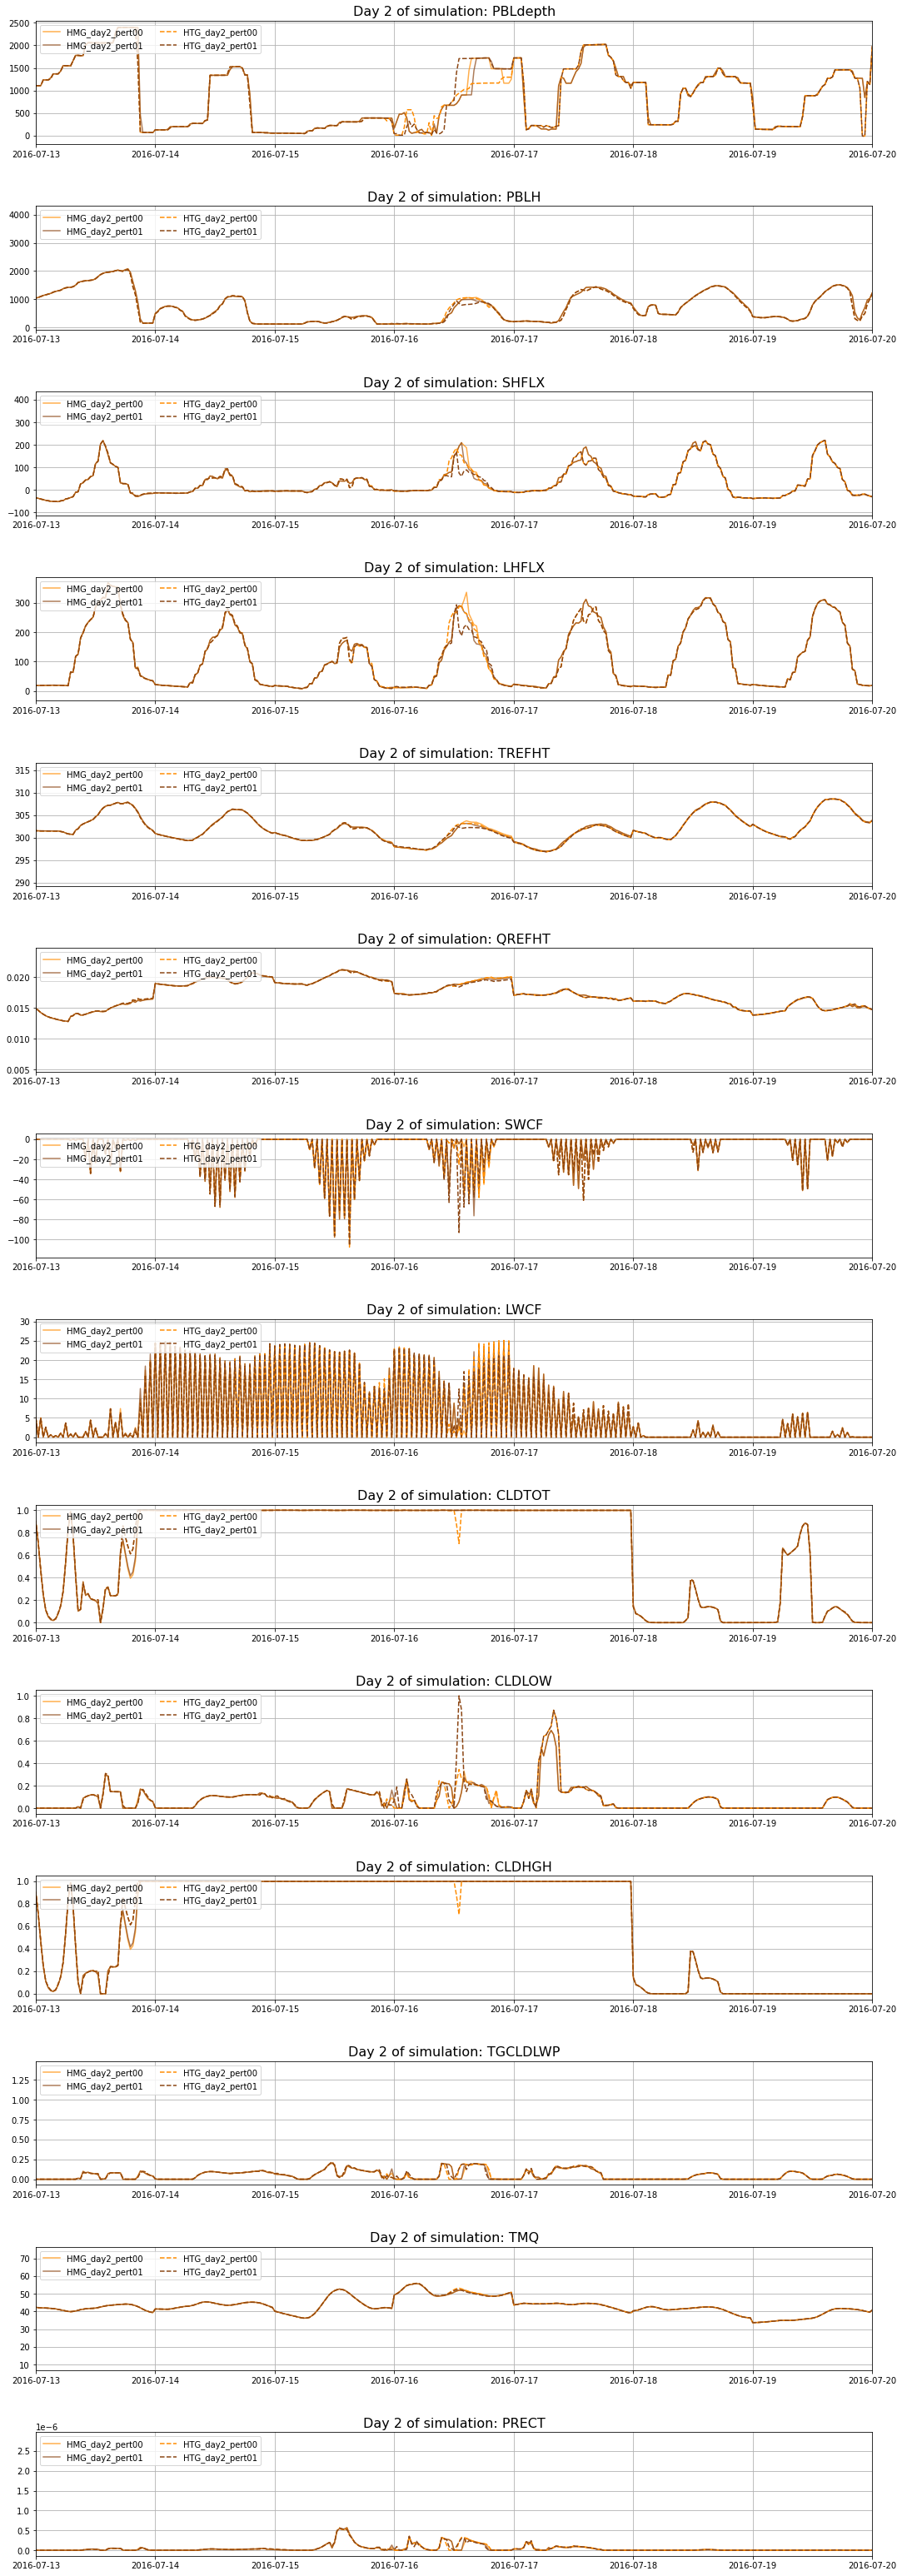

In [21]:
# Plot afternoon means of a selected variable 

# plotVar = 'PBLH'
# unitsStr = 'PBLH [m]'

plotVar     = ['PBLdepth','PBLH','SHFLX','LHFLX','TREFHT','QREFHT','SWCF','LWCF','CLDTOT','CLDLOW','CLDHGH','TGCLDLWP','TMQ','PRECT']
# startHr_plt = 12
# endHr_plt   = 18

## Set up plotting options 
plotHMG  = True
plotHTG  = True
plotDiff = False

fig,axs = plt.subplots(len(plotVar),1, figsize=(18,4*len(plotVar)))
axs     = axs.ravel()
fig.subplots_adjust(hspace=0.5)

for iPlotVar in range(len(plotVar)):

    ## To start: compute average over selected hours for each day lead time
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    real_varHMG_day2,real_varHTG_day2,diffHTG_day2 = meanVars_overHours(hmg_day2_upsample, 
                                                                        htg_day2_upsample, 
                                                                        plotVar[iPlotVar], startHr_plt, endHr_plt)
    ## Do the plotting
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
#     if plotHMG==True:
#         axs[iPlotVar].plot(np.arange(len(strDates_day2)),np.squeeze(real_varHMG_day2.sel(pertlim=0)), color='darkorange',  alpha=0.7,label='HMG_day2_pert00')    
#         axs[iPlotVar].plot(np.arange(len(strDates_day2)),np.squeeze(real_varHMG_day2.sel(pertlim=1)), color='saddlebrown', alpha=0.7,label='HMG_day2_pert01')

#     if plotHTG==True:
#         axs[iPlotVar].plot(np.arange(len(strDates_day2)),np.squeeze(real_varHTG_day2.sel(pertlim=0)),'--', color='darkorange', label='HTG_day2_pert00')    
#         axs[iPlotVar].plot(np.arange(len(strDates_day2)),np.squeeze(real_varHTG_day2.sel(pertlim=1)),'--', color='saddlebrown',label='HTG_day2_pert01')


#     if plotDiff==True:   
#         axs[iPlotVar].plot(np.arange(len(strDates_day2)),np.squeeze(diffHTG_day2.sel(pertlim=0)), color='darkorange', linewidth=2,label='HTG-HMG_day2_pert00')
#         axs[iPlotVar].plot(np.arange(len(strDates_day2)),np.squeeze(diffHTG_day2.sel(pertlim=1)),'--', color='saddlebrown', linewidth=2,label='HTG-HMG_day2_pert01')

#     ## Add indicators of positive/negative sensitivity day 
#     if plotDiff==True: 
#         axs[iPlotVar].plot(np.arange(len(strDates_day2))[listHigh_day2], np.squeeze(diffHTG_day2.sel(pertlim=0))[listHigh_day2],'k^',markersize=9,alpha=0.4, label='HighDay')
#         axs[iPlotVar].plot(np.arange(len(strDates_day2))[listLow_day2], np.squeeze(diffHTG_day2.sel(pertlim=0))[listLow_day2],'kv',markersize=9,alpha=0.4, label='LowDay')

    if plotHMG==True:
        axs[iPlotVar].plot(hmg_day2_upsample.time.values,np.squeeze(hmg_day2_upsample[plotVar[iPlotVar]].sel(pertlim=0)), color='darkorange',  alpha=0.7,label='HMG_day2_pert00')    
        axs[iPlotVar].plot(hmg_day2_upsample.time.values,np.squeeze(hmg_day2_upsample[plotVar[iPlotVar]].sel(pertlim=1)), color='saddlebrown', alpha=0.7,label='HMG_day2_pert01')

    if plotHTG==True:
        axs[iPlotVar].plot(htg_day2_upsample.time.values,np.squeeze(htg_day2_upsample[plotVar[iPlotVar]].sel(pertlim=0)),'--', color='darkorange', label='HTG_day2_pert00')    
        axs[iPlotVar].plot(htg_day2_upsample.time.values,np.squeeze(htg_day2_upsample[plotVar[iPlotVar]].sel(pertlim=1)),'--', color='saddlebrown',label='HTG_day2_pert01')


    if plotDiff==True:   
        axs[iPlotVar].plot(np.arange(len(strDates_day2)),np.squeeze(diffHTG_day2.sel(pertlim=0)), color='darkorange', linewidth=2,label='HTG-HMG_day2_pert00')
        axs[iPlotVar].plot(np.arange(len(strDates_day2)),np.squeeze(diffHTG_day2.sel(pertlim=1)),'--', color='saddlebrown', linewidth=2,label='HTG-HMG_day2_pert01')

    ## Add indicators of positive/negative sensitivity day 
    # if plotDiff==True: 
    #     axs[iPlotVar].plot(np.arange(len(strDates_day2))[listHigh_day2], np.squeeze(diffHTG_day2.sel(pertlim=0))[listHigh_day2],'k^',markersize=9,alpha=0.4, label='HighDay')
    #     axs[iPlotVar].plot(np.arange(len(strDates_day2))[listLow_day2], np.squeeze(diffHTG_day2.sel(pertlim=0))[listLow_day2],'kv',markersize=9,alpha=0.4, label='LowDay')

    ## Control how plots display (ticks, labels, etc)
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

    ## Add legends
    axs[iPlotVar].legend(ncol=2,loc='upper left')


    ## Labels and Titles 
    axs[iPlotVar].set_title('Day 2 of simulation: '+plotVar[iPlotVar], fontsize=16)

#     ## Limits on axes and tick labels 
#     axs[iPlotVar].set_xlim([130, 140])

    axs[iPlotVar].set_xlim([datetime.date(2016,7,13), datetime.date(2016,7,20)])

#     ## Control xticks 
#     xTicks       = axs[iPlotVar].get_xticks()
#     dates_xticks = strDates_day2[xTicks.astype(int)[:-1]]
#     axs[iPlotVar].set_xticklabels(dates_xticks)
#     for iYr in range(len(yrStart_day2)):
#             axs[iPlotVar].axvline(yrStart_day2[iYr], color='k',linestyle='--')
        
    if plotDiff==True:
        axs[iPlotVar].axhline(0,color='k',linestyle='--')
    
    axs[iPlotVar].grid()
    
    # if plotVar[iPlotVar]=='TREFHT':
    #     axs[iPlotVar].set_ylim([300,312])
    # elif plotVar[iPlotVar]=='QREFHT':
    #     axs[iPlotVar].set_ylim([0.014,0.021])


plt.show()


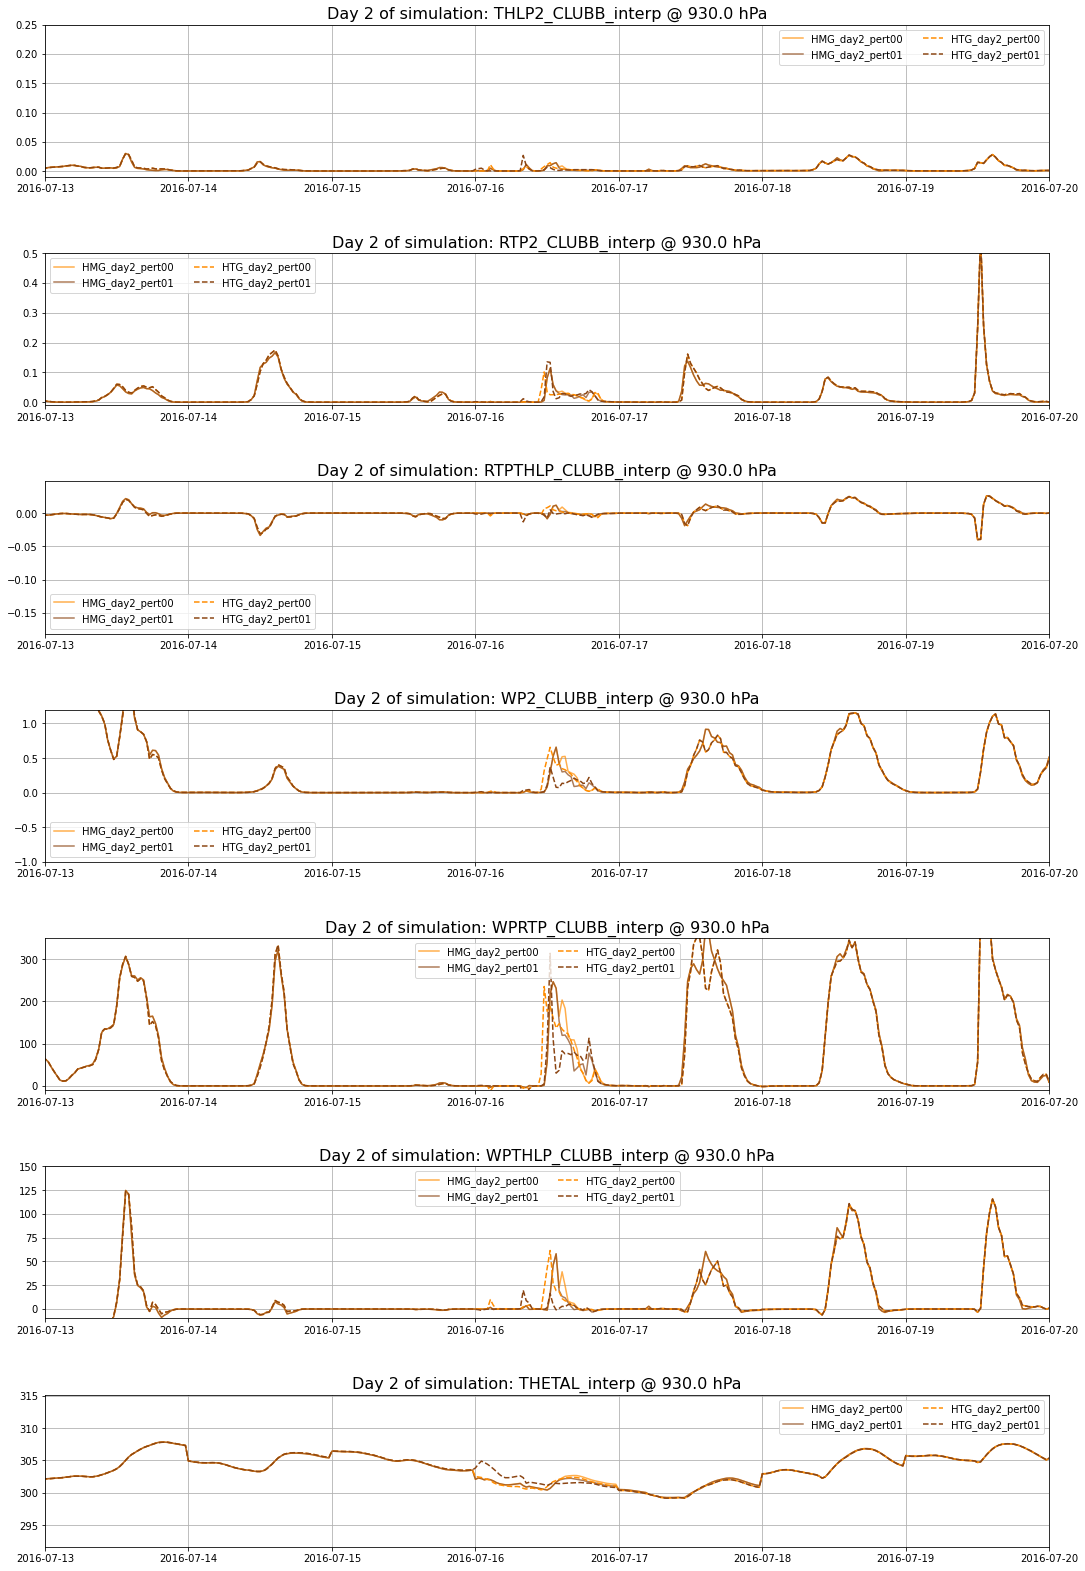

In [29]:
# Plot afternoon means of a selected variable 

# plotVar = 'PBLH'
# unitsStr = 'PBLH [m]'

plotVar     = ['THLP2_CLUBB_interp','RTP2_CLUBB_interp','RTPTHLP_CLUBB_interp','WP2_CLUBB_interp','WPRTP_CLUBB_interp','WPTHLP_CLUBB_interp','THETAL_interp']
startHr_plt = 12
endHr_plt   = 18

levSel = -5

## Set up plotting options 
plotHMG  = True
plotHTG  = True
plotDiff = False

fig,axs = plt.subplots(len(plotVar),1, figsize=(18,4*len(plotVar)))
axs     = axs.ravel()
fig.subplots_adjust(hspace=0.5)

for iPlotVar in range(len(plotVar)):

    ## To start: compute average over selected hours for each day lead time
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    real_varHMG_day2,real_varHTG_day2,diffHTG_day2 = meanVars_overHours(hmg_day2_upsample, 
                                                                        htg_day2_upsample, 
                                                                        plotVar[iPlotVar], startHr_plt, endHr_plt)
    ## Do the plotting
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
#     if plotHMG==True:
#         axs[iPlotVar].plot(np.arange(len(strDates_day2)),np.squeeze(real_varHMG_day2.sel(pertlim=0).isel(levInterp=levSel)), color='darkorange',  alpha=0.7,label='HMG_day2_pert00')    
#         axs[iPlotVar].plot(np.arange(len(strDates_day2)),np.squeeze(real_varHMG_day2.sel(pertlim=1).isel(levInterp=levSel)), color='saddlebrown', alpha=0.7,label='HMG_day2_pert01')

#     if plotHTG==True:
#         axs[iPlotVar].plot(np.arange(len(strDates_day2)),np.squeeze(real_varHTG_day2.sel(pertlim=0).isel(levInterp=levSel)),'--', color='darkorange', label='HTG_day2_pert00')    
#         axs[iPlotVar].plot(np.arange(len(strDates_day2)),np.squeeze(real_varHTG_day2.sel(pertlim=1).isel(levInterp=levSel)),'--', color='saddlebrown',label='HTG_day2_pert01')

    if plotHMG==True:
        axs[iPlotVar].plot(hmg_day2_upsample.time.values,np.squeeze(hmg_day2_upsample[plotVar[iPlotVar]].sel(pertlim=0).isel(levInterp=levSel)), color='darkorange',  alpha=0.7,label='HMG_day2_pert00')    
        axs[iPlotVar].plot(hmg_day2_upsample.time.values,np.squeeze(hmg_day2_upsample[plotVar[iPlotVar]].sel(pertlim=1).isel(levInterp=levSel)), color='saddlebrown', alpha=0.7,label='HMG_day2_pert01')

    if plotHTG==True:
        axs[iPlotVar].plot(htg_day2_upsample.time.values,np.squeeze(htg_day2_upsample[plotVar[iPlotVar]].sel(pertlim=0).isel(levInterp=levSel)),'--', color='darkorange', label='HTG_day2_pert00')    
        axs[iPlotVar].plot(htg_day2_upsample.time.values,np.squeeze(htg_day2_upsample[plotVar[iPlotVar]].sel(pertlim=1).isel(levInterp=levSel)),'--', color='saddlebrown',label='HTG_day2_pert01')


    if plotDiff==True:   
        axs[iPlotVar].plot(np.arange(len(strDates_day2)),np.squeeze(diffHTG_day2.sel(pertlim=0).isel(levInterp=levSel)), color='darkorange', linewidth=2,label='HTG-HMG_day2_pert00')
        axs[iPlotVar].plot(np.arange(len(strDates_day2)),np.squeeze(diffHTG_day2.sel(pertlim=1).isel(levInterp=levSel)),'--', color='saddlebrown', linewidth=2,label='HTG-HMG_day2_pert01')

    ## Add indicators of positive/negative sensitivity day 
    if plotDiff==True: 
        axs[iPlotVar].plot(np.arange(len(strDates_day2))[listHigh_day2], np.squeeze(diffHTG_day2.sel(pertlim=0).isel(levInterp=levSel))[listHigh_day2],'k^',markersize=9,alpha=0.4, label='HighDay')
        axs[iPlotVar].plot(np.arange(len(strDates_day2))[listLow_day2], np.squeeze(diffHTG_day2.sel(pertlim=0).isel(levInterp=levSel))[listLow_day2],'kv',markersize=9,alpha=0.4, label='LowDay')

    ## Control how plots display (ticks, labels, etc)
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

    ## Add legends
    axs[iPlotVar].legend(ncol=2)


    ## Labels and Titles 
    axs[iPlotVar].set_title('Day 2 of simulation: '+plotVar[iPlotVar]+' @ '+str(real_varHMG_day2['levInterp'].values[levSel])+' hPa', fontsize=16)

#     ## Limits on axes and tick labels 
#     axs[iPlotVar].set_xlim([130, 140])

#     ## Control xticks 
#     xTicks       = axs[iPlotVar].get_xticks()
#     dates_xticks = strDates_day2[xTicks.astype(int)[:-1]]
#     axs[iPlotVar].set_xticklabels(dates_xticks)
#     for iYr in range(len(yrStart_day2)):
#             axs[iPlotVar].axvline(yrStart_day2[iYr], color='k',linestyle='--')

    axs[iPlotVar].set_xlim([datetime.date(2016,7,13), datetime.date(2016,7,20)])
        
    if plotDiff==True:
        axs[iPlotVar].axhline(0,color='k',linestyle='--')
    
    axs[iPlotVar].grid()
    
    ## levSel =-5
    # if plotVar[iPlotVar]=='THLP2_CLUBB_interp':
    #     axs[iPlotVar].set_ylim([-0.01,0.02])
    # elif plotVar[iPlotVar]=='RTP2_CLUBB_interp':
    #     axs[iPlotVar].set_ylim([-0.01,0.125])
    # elif plotVar[iPlotVar]=='WP2_CLUBB_interp':
    #     axs[iPlotVar].set_ylim([-0.1,1.0])
    # elif plotVar[iPlotVar]=='WPTHLP_CLUBB_interp':
    #     axs[iPlotVar].set_ylim([-10,110])
    # elif plotVar[iPlotVar]=='WPRTP_CLUBB_interp':
    #     axs[iPlotVar].set_ylim([-10,300])
    
    ## levSel =-1
    if plotVar[iPlotVar]=='THLP2_CLUBB_interp':
        axs[iPlotVar].set_ylim([-0.01,0.25])
    elif plotVar[iPlotVar]=='RTP2_CLUBB_interp':
        axs[iPlotVar].set_ylim([-0.01,0.5])
    elif plotVar[iPlotVar]=='WP2_CLUBB_interp':
        axs[iPlotVar].set_ylim([-1,1.2])
    elif plotVar[iPlotVar]=='WPTHLP_CLUBB_interp':
        axs[iPlotVar].set_ylim([-10,150])
    elif plotVar[iPlotVar]=='WPRTP_CLUBB_interp':
        axs[iPlotVar].set_ylim([-10,350])

plt.show()


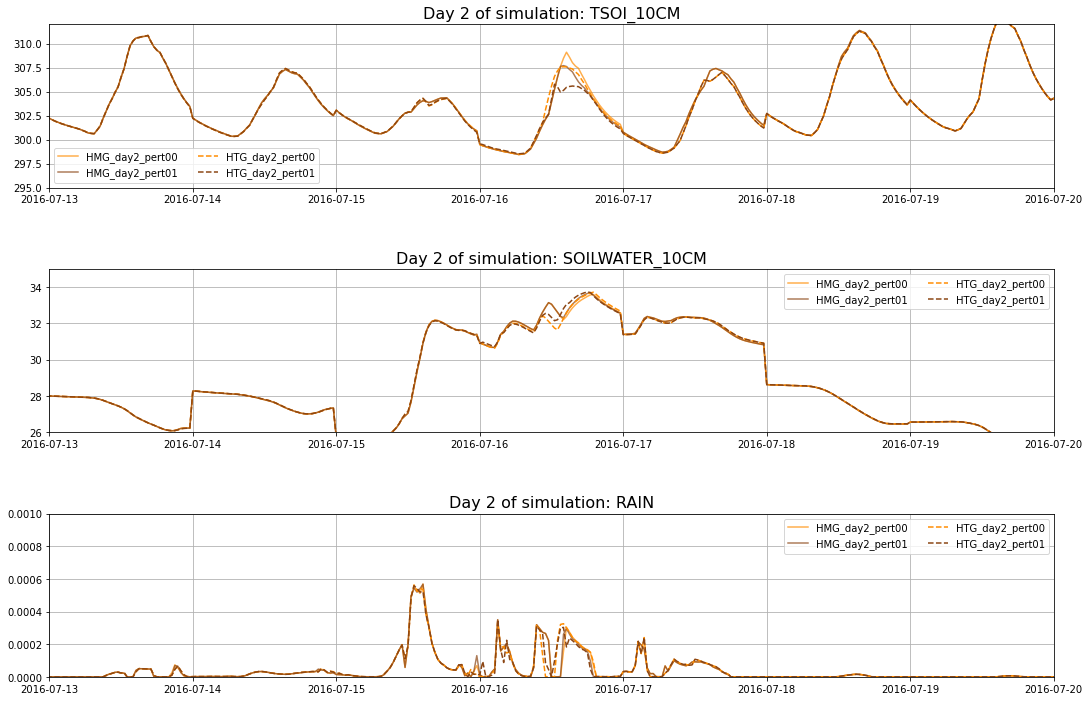

In [30]:
# Plot afternoon means of a selected variable 

# plotVar = 'PBLH'
# unitsStr = 'PBLH [m]'

plotVar     = ['TSOI_10CM','SOILWATER_10CM','RAIN']
startHr_plt = 12
endHr_plt   = 18

## Set up plotting options 
plotHMG  = True
plotHTG  = True
plotDiff = False

fig,axs = plt.subplots(len(plotVar),1, figsize=(18,4*len(plotVar)))
axs     = axs.ravel()
fig.subplots_adjust(hspace=0.5)

for iPlotVar in range(len(plotVar)):

    ## To start: compute average over selected hours for each day lead time
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    real_varHMG_day2,real_varHTG_day2,diffHTG_day2 = meanVars_overHours(hmgCLM_day2_upsample, 
                                                                        htgCLM_day2_upsample, 
                                                                        plotVar[iPlotVar], startHr_plt, endHr_plt)
    ## Do the plotting
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    if plotHMG==True:
        axs[iPlotVar].plot(hmgCLM_day2_upsample.time.values,np.squeeze(hmgCLM_day2_upsample[plotVar[iPlotVar]].sel(pertlim=0)), color='darkorange',  alpha=0.7,label='HMG_day2_pert00')    
        axs[iPlotVar].plot(hmgCLM_day2_upsample.time.values,np.squeeze(hmgCLM_day2_upsample[plotVar[iPlotVar]].sel(pertlim=1)), color='saddlebrown', alpha=0.7,label='HMG_day2_pert01')

    if plotHTG==True:
        axs[iPlotVar].plot(htgCLM_day2_upsample.time.values,np.squeeze(htgCLM_day2_upsample[plotVar[iPlotVar]].sel(pertlim=0)),'--', color='darkorange', label='HTG_day2_pert00')    
        axs[iPlotVar].plot(htgCLM_day2_upsample.time.values,np.squeeze(htgCLM_day2_upsample[plotVar[iPlotVar]].sel(pertlim=1)),'--', color='saddlebrown',label='HTG_day2_pert01')


    if plotDiff==True:   
        axs[iPlotVar].plot(np.arange(len(strDates_day2)),np.squeeze(diffHTG_day2.sel(pertlim=0)), color='darkorange', linewidth=2,label='HTG-HMG_day2_pert00')
        axs[iPlotVar].plot(np.arange(len(strDates_day2)),np.squeeze(diffHTG_day2.sel(pertlim=1)),'--', color='saddlebrown', linewidth=2,label='HTG-HMG_day2_pert01')

    ## Add indicators of positive/negative sensitivity day 
    if plotDiff==True: 
        axs[iPlotVar].plot(np.arange(len(strDates_day2))[listHigh_day2], np.squeeze(diffHTG_day2.sel(pertlim=0))[listHigh_day2],'k^',markersize=9,alpha=0.4, label='HighDay')
        axs[iPlotVar].plot(np.arange(len(strDates_day2))[listLow_day2], np.squeeze(diffHTG_day2.sel(pertlim=0))[listLow_day2],'kv',markersize=9,alpha=0.4, label='LowDay')

    ## Control how plots display (ticks, labels, etc)
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

    ## Add legends
    axs[iPlotVar].legend(ncol=2)


    ## Labels and Titles 
    axs[iPlotVar].set_title('Day 2 of simulation: '+plotVar[iPlotVar], fontsize=16)

    axs[iPlotVar].set_xlim([datetime.date(2016,7,13), datetime.date(2016,7,20)])
    
#     ## Limits on axes and tick labels 
#     axs[iPlotVar].set_xlim([130, 140])

#     ## Control xticks 
#     xTicks       = axs[iPlotVar].get_xticks()
#     dates_xticks = strDates_day2[xTicks.astype(int)[:-1]]
#     axs[iPlotVar].set_xticklabels(dates_xticks)
#     for iYr in range(len(yrStart_day2)):
#             axs[iPlotVar].axvline(yrStart_day2[iYr], color='k',linestyle='--')
        
    if plotDiff==True:
        axs[iPlotVar].axhline(0,color='k',linestyle='--')
    
    axs[iPlotVar].grid()
    
    if plotVar[iPlotVar]=='TSOI_10CM':
        axs[iPlotVar].set_ylim([295,312])
    elif plotVar[iPlotVar]=='SOILWATER_10CM':
        axs[iPlotVar].set_ylim([26,35])
    elif plotVar[iPlotVar]=='RAIN':
        axs[iPlotVar].set_ylim([0,0.001])


plt.show()


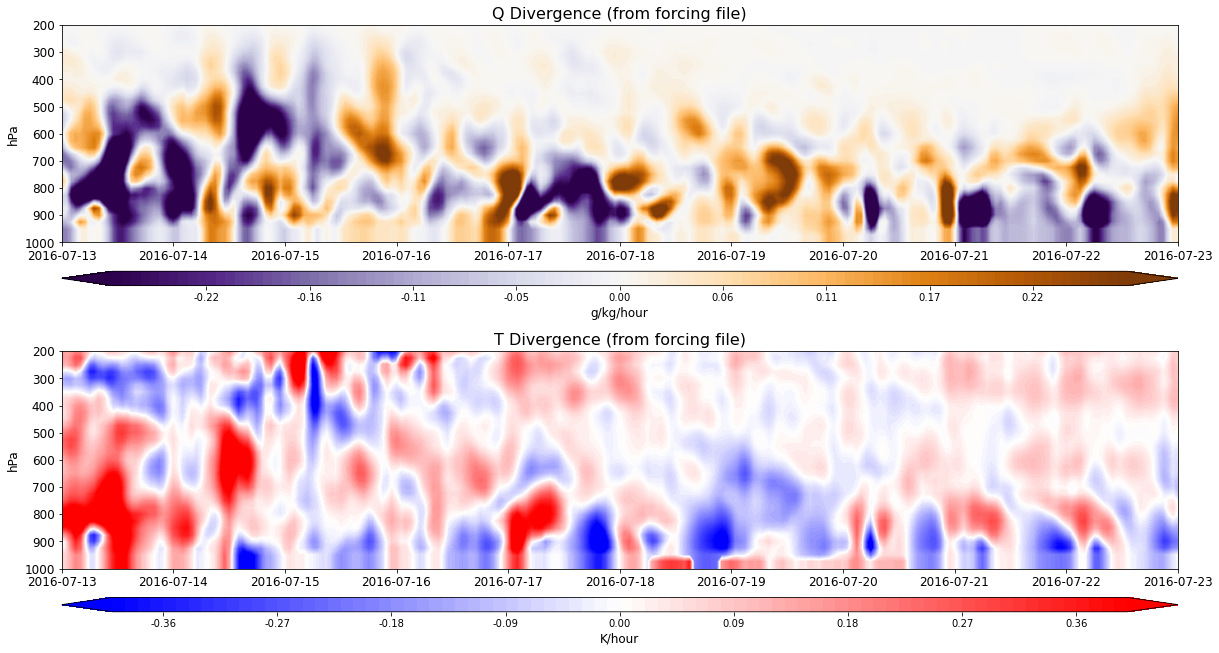

In [17]:
## Read in obs file to get a sense of large scale forcing

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

nateFile = '/glade/work/mdfowler/CLASP/clasp-htg.bdate.nc'
nateDS = xr.open_dataset(nateFile, decode_times=True)

## Convert to local time too 
nateDS_local       = nateDS.copy(deep=True)

# Confirmed that all the times are identical, so using the same local time arrays
localTimes = nateDS_local['time'].values - np.timedelta64(5,'h')

# Replace time dimension with local time
nateDS_local = nateDS_local.assign_coords({"time": localTimes})

# Also round to nearest hour, since some are a few minutes before/after minute 00: 
nateDS_HTG_roundHrs = nateDS_local['time'].dt.round("H")
nateDS_local        = nateDS_local.assign_coords({"time": nateDS_HTG_roundHrs})

# Add month_day index
month_day_idx                         = pd.MultiIndex.from_arrays([nateDS_local['time.year'].values,
                                                                nateDS_local['time.month'].values, 
                                                                nateDS_local['time.day'].values])
nateDS_local.coords['year_month_day'] = ('time', month_day_idx)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -     

## Plot the forcing for a certain day 
levsQ = np.arange(-0.27, 0.275, 0.005)
levsT = np.arange(-0.4, 0.41, 0.01)

# fig,axs = plt.subplots(2,3, figsize=(15,10))
fig,axs = plt.subplots(2,1, figsize=(20,10))
axs     = axs.ravel()
fig.subplots_adjust(hspace=0.5)

levAtm  = nateDS_local['lev'].values

## Plot Q divergence
cp = axs[0].contourf(nateDS_local.time.values, levAtm, np.squeeze(np.transpose(nateDS_local['q_adv_h'].values)), 
                    levsQ, cmap='PuOr_r', extend='both')
# Add colorbar
ax_position = axs[0].get_position()
cbar_ax = fig.add_axes([ax_position.x0, ax_position.y0-0.06, ax_position.width, 0.02])
cbar = plt.colorbar(cp, orientation='horizontal',cax=cbar_ax, format='%.2f')
cbar.set_label(nateDS_local['q_adv_h'].units,fontsize=12)

## Plot T divergence
cp = axs[1].contourf(nateDS_local.time.values, levAtm, np.squeeze(np.transpose(nateDS_local['T_adv_h'].values)), 
                    levsT, cmap='bwr', extend='both')
# Add colorbar
ax_position = axs[1].get_position()
cbar_ax = fig.add_axes([ax_position.x0, ax_position.y0-0.06, ax_position.width, 0.02])
cbar = plt.colorbar(cp, orientation='horizontal',cax=cbar_ax, format='%.2f')
cbar.set_label(nateDS_local['T_adv_h'].units,fontsize=12)

# Invert axes and set up titles/labels
axs[0].invert_yaxis()
axs[1].invert_yaxis()


axs[0].set_ylim([1000,200])
axs[1].set_ylim([1000,200])

# Set labels
axs[0].set_title('Q Divergence (from forcing file)', fontsize=16)
axs[1].set_title('T Divergence (from forcing file)', fontsize=16)

axs[0].set_ylabel('hPa', fontsize=12)
axs[1].set_ylabel('hPa', fontsize=12)

## Limits on axes and tick labels 
axs[0].set_xlim([datetime.date(2016,7,13), datetime.date(2016,7,23)])
axs[1].set_xlim([datetime.date(2016,7,13), datetime.date(2016,7,23)])

axs[0].tick_params(axis='both', labelsize= 12)
axs[1].tick_params(axis='both', labelsize= 12)


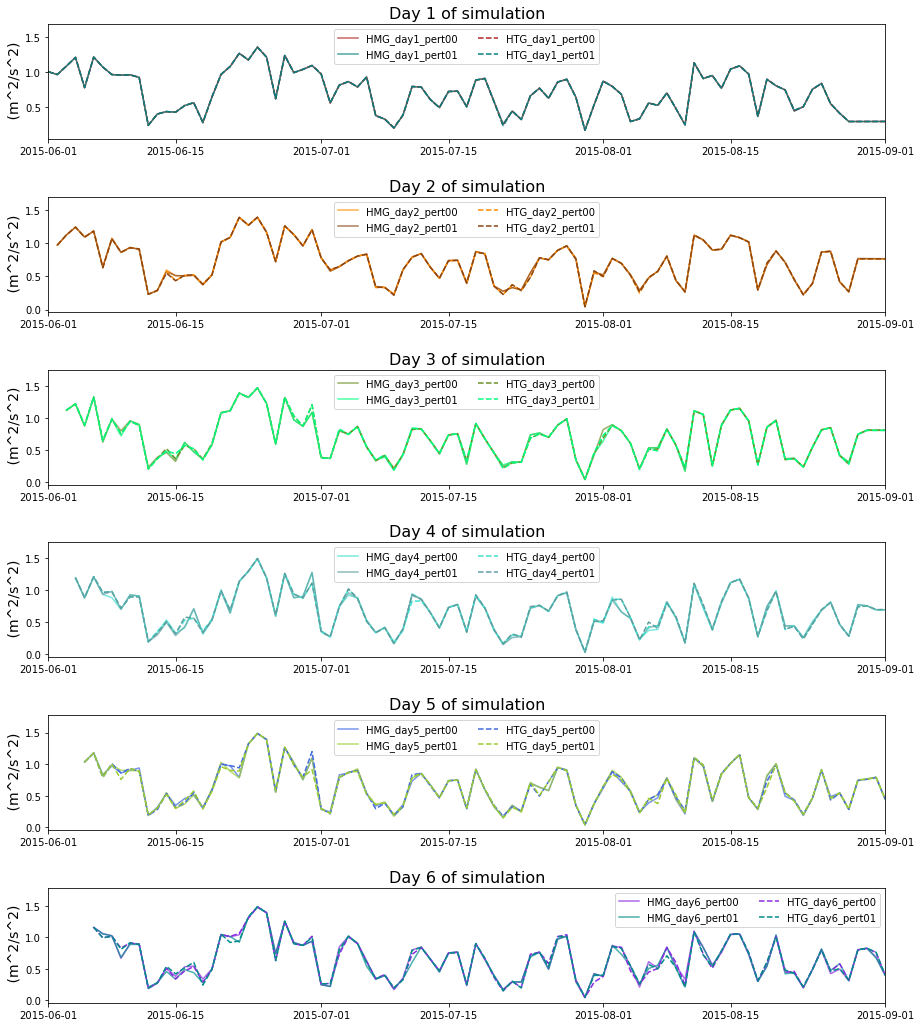

In [20]:
# Plot afternoon means of a selected variable (and at a given level)

# plotVar = 'THLP2_CLUBB_interp'
# unitsStr = ' (K^2)'

plotVar = 'WP2_CLUBB_interp'
unitsStr = ' (m^2/s^2)'

# plotVar = 'WPTHLP_CLUBB_interp'
# unitsStr = ' (K m/s)'

# plotVar = 'THETAL_interp'
# unitsStr = ' (K)'

levSel = -1

startHr_plt = 12
endHr_plt   = 18

## To start: compute average over selected hours for each day lead time
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

real_varHMG_day1,real_varHTG_day1,diffHTG_day1 = meanVars_overHours(hmg_day1_upsample, 
                                                                    htg_day1_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day2,real_varHTG_day2,diffHTG_day2 = meanVars_overHours(hmg_day2_upsample, 
                                                                    htg_day2_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day3,real_varHTG_day3,diffHTG_day3 = meanVars_overHours(hmg_day3_upsample, 
                                                                    htg_day3_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day4,real_varHTG_day4,diffHTG_day4 = meanVars_overHours(hmg_day4_upsample, 
                                                                    htg_day4_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day5,real_varHTG_day5,diffHTG_day5 = meanVars_overHours(hmg_day5_upsample, 
                                                                    htg_day5_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day6,real_varHTG_day6,diffHTG_day6 = meanVars_overHours(hmg_day6_upsample, 
                                                                    htg_day6_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## Set up plotting options 
plotHMG  = False
plotHTG  = False
plotDiff = True

startDate = datetime.date(2015,6,1)
endDate   = datetime.date(2015,9,1)

fig,axs = plt.subplots(6,1, figsize=(15,18))
axs     = axs.ravel()
fig.subplots_adjust(hspace=0.5)

if plotHMG==True:
    axs[0].plot(strDates_day1,np.squeeze(real_varHMG_day1.sel(pertlim=0))[:,levSel], color='firebrick',  alpha=0.7,label='HMG_day1_pert00')
    axs[1].plot(strDates_day2,np.squeeze(real_varHMG_day2.sel(pertlim=0))[:,levSel], color='darkorange', alpha=0.7,label='HMG_day2_pert00')
    axs[2].plot(strDates_day3,np.squeeze(real_varHMG_day3.sel(pertlim=0))[:,levSel], color='olivedrab',  alpha=0.7,label='HMG_day3_pert00')
    axs[3].plot(strDates_day4,np.squeeze(real_varHMG_day4.sel(pertlim=0))[:,levSel], color='turquoise',  alpha=0.7,label='HMG_day4_pert00')
    axs[4].plot(strDates_day5,np.squeeze(real_varHMG_day5.sel(pertlim=0))[:,levSel], color='royalblue',  alpha=0.7,label='HMG_day5_pert00')
    axs[5].plot(strDates_day6,np.squeeze(real_varHMG_day6.sel(pertlim=0))[:,levSel], color='blueviolet', alpha=0.7,label='HMG_day6_pert00')
    
    axs[0].plot(strDates_day1,np.squeeze(real_varHMG_day1.sel(pertlim=1))[:,levSel], color='teal',       alpha=0.7,label='HMG_day1_pert01')
    axs[1].plot(strDates_day2,np.squeeze(real_varHMG_day2.sel(pertlim=1))[:,levSel], color='saddlebrown',      alpha=0.7,label='HMG_day2_pert01')
    axs[2].plot(strDates_day3,np.squeeze(real_varHMG_day3.sel(pertlim=1))[:,levSel], color='springgreen',      alpha=0.7,label='HMG_day3_pert01')
    axs[3].plot(strDates_day4,np.squeeze(real_varHMG_day4.sel(pertlim=1))[:,levSel], color='cadetblue',        alpha=0.7,label='HMG_day4_pert01')
    axs[4].plot(strDates_day5,np.squeeze(real_varHMG_day5.sel(pertlim=1))[:,levSel], color='yellowgreen',  alpha=0.7,label='HMG_day5_pert01')
    axs[5].plot(strDates_day6,np.squeeze(real_varHMG_day6.sel(pertlim=1))[:,levSel], color='darkcyan',      alpha=0.7,label='HMG_day6_pert01')
    
if plotHTG==True:
    axs[0].plot(strDates_day1,np.squeeze(real_varHTG_day1.sel(pertlim=0))[:,levSel],'--', color='firebrick',  label='HTG_day1_pert00')
    axs[1].plot(strDates_day2,np.squeeze(real_varHTG_day2.sel(pertlim=0))[:,levSel],'--', color='darkorange', label='HTG_day2_pert00')
    axs[2].plot(strDates_day3,np.squeeze(real_varHTG_day3.sel(pertlim=0))[:,levSel],'--', color='olivedrab',  label='HTG_day3_pert00')
    axs[3].plot(strDates_day4,np.squeeze(real_varHTG_day4.sel(pertlim=0))[:,levSel],'--', color='turquoise',  label='HTG_day4_pert00')
    axs[4].plot(strDates_day5,np.squeeze(real_varHTG_day5.sel(pertlim=0))[:,levSel],'--', color='royalblue',  label='HTG_day5_pert00')
    axs[5].plot(strDates_day6,np.squeeze(real_varHTG_day6.sel(pertlim=0))[:,levSel],'--', color='blueviolet', label='HTG_day6_pert00')
    
    axs[0].plot(strDates_day1,np.squeeze(real_varHTG_day1.sel(pertlim=1))[:,levSel],'--', color='teal',              label='HTG_day1_pert01')
    axs[1].plot(strDates_day2,np.squeeze(real_varHTG_day2.sel(pertlim=1))[:,levSel],'--', color='saddlebrown',       label='HTG_day2_pert01')
    axs[2].plot(strDates_day3,np.squeeze(real_varHTG_day3.sel(pertlim=1))[:,levSel],'--', color='springgreen',        label='HTG_day3_pert01')
    axs[3].plot(strDates_day4,np.squeeze(real_varHTG_day4.sel(pertlim=1))[:,levSel],'--', color='cadetblue',        label='HTG_day4_pert01')
    axs[4].plot(strDates_day5,np.squeeze(real_varHTG_day5.sel(pertlim=1))[:,levSel],'--', color='yellowgreen',  label='HTG_day5_pert01')
    axs[5].plot(strDates_day6,np.squeeze(real_varHTG_day6.sel(pertlim=1))[:,levSel],'--', color='darkcyan',      label='HTG_day6_pert01')
    
if plotDiff==True:   
    axs[0].plot(strDates_day1,np.squeeze(diffHTG_day1.sel(pertlim=0))[:,levSel], color='firebrick', linewidth=2,  label='HTG-HMG_day1_pert00')
    axs[1].plot(strDates_day2,np.squeeze(diffHTG_day2.sel(pertlim=0))[:,levSel], color='darkorange', linewidth=2,label='HTG-HMG_day2_pert00')
    axs[2].plot(strDates_day3,np.squeeze(diffHTG_day3.sel(pertlim=0))[:,levSel], color='yellowgreen',  linewidth=2,label='HTG-HMG_day3_pert00')
    axs[3].plot(strDates_day4,np.squeeze(diffHTG_day4.sel(pertlim=0))[:,levSel], color='turquoise',  linewidth=2,label='HTG-HMG_day4_pert00')
    axs[4].plot(strDates_day5,np.squeeze(diffHTG_day5.sel(pertlim=0))[:,levSel], color='royalblue',  linewidth=2,label='HTG-HMG_day5_pert00')
    axs[5].plot(strDates_day6,np.squeeze(diffHTG_day6.sel(pertlim=0))[:,levSel], color='blueviolet', linewidth=2,label='HTG-HMG_day6_pert00')
    
    axs[0].plot(strDates_day1,np.squeeze(diffHTG_day1.sel(pertlim=1))[:,levSel],'--', color='teal',  linewidth=2,label='HTG-HMG_day1_pert01')
    axs[1].plot(strDates_day2,np.squeeze(diffHTG_day2.sel(pertlim=1))[:,levSel],'--', color='saddlebrown', linewidth=2,label='HTG-HMG_day2_pert01')
    axs[2].plot(strDates_day3,np.squeeze(diffHTG_day3.sel(pertlim=1))[:,levSel],'--', color='steelblue',  linewidth=2,label='HTG-HMG_day3_pert01')
    axs[3].plot(strDates_day4,np.squeeze(diffHTG_day4.sel(pertlim=1))[:,levSel],'--', color='cadetblue',  linewidth=2,label='HTG-HMG_day4_pert01')
    axs[4].plot(strDates_day5,np.squeeze(diffHTG_day5.sel(pertlim=1))[:,levSel],'--', color='yellowgreen', linewidth=2, label='HTG-HMG_day5_pert01')
    axs[5].plot(strDates_day6,np.squeeze(diffHTG_day6.sel(pertlim=1))[:,levSel],'--', color='darkcyan',linewidth=2, label='HTG-HMG_day6_pert01')

## Add indicators of positive/negative sensitivity day 
# if ( (plotHMG==True) | (plotHTG==True)): 
#     axs[0].plot(strDates_day1[listHigh_day1], np.squeeze(real_varHMG_day1)[listHigh_day1],'k^',markersize=9,alpha=0.4, label='HighDay')
if plotDiff==True: 
    axs[0].plot(strDates_day1[listHigh_day1], np.squeeze(diffHTG_day1.sel(pertlim=0))[listHigh_day1,levSel],'k^',markersize=9,alpha=0.4, label='HighDay')
    axs[1].plot(strDates_day2[listHigh_day2], np.squeeze(diffHTG_day2.sel(pertlim=0))[listHigh_day2,levSel],'k^',markersize=9,alpha=0.4, label='HighDay')
    axs[2].plot(strDates_day3[listHigh_day3], np.squeeze(diffHTG_day3.sel(pertlim=0))[listHigh_day3,levSel],'k^',markersize=9,alpha=0.4, label='HighDay')
    axs[3].plot(strDates_day4[listHigh_day4], np.squeeze(diffHTG_day4.sel(pertlim=0))[listHigh_day4,levSel],'k^',markersize=9,alpha=0.4, label='HighDay')
    axs[4].plot(strDates_day5[listHigh_day5], np.squeeze(diffHTG_day5.sel(pertlim=0))[listHigh_day5,levSel],'k^',markersize=9,alpha=0.4, label='HighDay')
    axs[5].plot(strDates_day6[listHigh_day6], np.squeeze(diffHTG_day6.sel(pertlim=0))[listHigh_day6,levSel],'k^',markersize=9,alpha=0.4, label='HighDay')

    axs[0].plot(strDates_day1[listLow_day1], np.squeeze(diffHTG_day1.sel(pertlim=0))[listLow_day1,levSel],'kv',markersize=9,alpha=0.4, label='LowDay')
    axs[1].plot(strDates_day2[listLow_day2], np.squeeze(diffHTG_day2.sel(pertlim=0))[listLow_day2,levSel],'kv',markersize=9,alpha=0.4, label='LowDay')
    axs[2].plot(strDates_day3[listLow_day3], np.squeeze(diffHTG_day3.sel(pertlim=0))[listLow_day3,levSel],'kv',markersize=9,alpha=0.4, label='LowDay')
    axs[3].plot(strDates_day4[listLow_day4], np.squeeze(diffHTG_day4.sel(pertlim=0))[listLow_day4,levSel],'kv',markersize=9,alpha=0.4, label='LowDay')
    axs[4].plot(strDates_day5[listLow_day5], np.squeeze(diffHTG_day5.sel(pertlim=0))[listLow_day5,levSel],'kv',markersize=9,alpha=0.4, label='LowDay')
    axs[5].plot(strDates_day6[listLow_day6], np.squeeze(diffHTG_day6.sel(pertlim=0))[listLow_day6,levSel],'kv',markersize=9,alpha=0.4, label='LowDay')

## Control how plots display (ticks, labels, etc)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## Add legends
axs[0].legend(ncol=2)
axs[1].legend(ncol=2)
axs[2].legend(ncol=2)
axs[3].legend(ncol=2)
axs[4].legend(ncol=2)
axs[5].legend(ncol=2)

## Labels and Titles 
axs[0].set_title('Day 1 of simulation', fontsize=16)
axs[1].set_title('Day 2 of simulation', fontsize=16)
axs[2].set_title('Day 3 of simulation', fontsize=16)
axs[3].set_title('Day 4 of simulation', fontsize=16)
axs[4].set_title('Day 5 of simulation', fontsize=16)
axs[5].set_title('Day 6 of simulation', fontsize=16)

axs[0].set_ylabel(unitsStr, fontsize=14)
axs[1].set_ylabel(unitsStr, fontsize=14)
axs[2].set_ylabel(unitsStr, fontsize=14)
axs[3].set_ylabel(unitsStr, fontsize=14)
axs[4].set_ylabel(unitsStr, fontsize=14)
axs[5].set_ylabel(unitsStr, fontsize=14)

## Limits on axes and tick labels 
axs[0].set_xlim([startDate, endDate])
axs[1].set_xlim([startDate, endDate])
axs[2].set_xlim([startDate, endDate])
axs[3].set_xlim([startDate, endDate])
axs[4].set_xlim([startDate, endDate])
axs[5].set_xlim([startDate, endDate])

if plotDiff==True:
    axs[0].axhline(0,color='k',linestyle='--')
    axs[1].axhline(0,color='k',linestyle='--')
    axs[2].axhline(0,color='k',linestyle='--')
    axs[3].axhline(0,color='k',linestyle='--')
    axs[4].axhline(0,color='k',linestyle='--')
    axs[5].axhline(0,color='k',linestyle='--')
    
    axs[0].grid()
    axs[1].grid()
    axs[2].grid()
    axs[3].grid()
    axs[4].grid()
    axs[5].grid()

plt.show()


### Average 'sensitive' days

In [31]:
def getMeanDiurnal_sensDays(hmgDS_allDays, htgDS_allDays, 
                            hmgDS_dayMean, htgDS_dayMean,
                            strDates, listHigh, listLow): 
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -  
    ## Get full arrays that match low/high percentiles

    allIndicies        = np.arange(0,len(strDates))
    restOfIndices_real = list(set(allIndicies) - set(listHigh) - set(listLow))
                              
    # HMG case
    highPct_HMG    = getTimes_basedOnDates(hmgDS_allDays,     
                                           hmgDS_dayMean.isel(year_month_day=listHigh))
    lowPct_HMG     = getTimes_basedOnDates(hmgDS_allDays,     
                                           hmgDS_dayMean.isel(year_month_day=listLow))
    restOfDays_HMG = getTimes_basedOnDates(hmgDS_allDays,     
                                           hmgDS_dayMean.isel(year_month_day=restOfIndices_real))

    # HTG case
    highPct_HTG    = getTimes_basedOnDates(htgDS_allDays,     
                                           htgDS_dayMean.isel(year_month_day=listHigh))
    lowPct_HTG     = getTimes_basedOnDates(htgDS_allDays,     
                                           htgDS_dayMean.isel(year_month_day=listLow))
    restOfDays_HTG = getTimes_basedOnDates(htgDS_allDays,     
                                           htgDS_dayMean.isel(year_month_day=restOfIndices_real))

    
    print('Done isolating high/low/rest DS')
    
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -  
    ## Get hourly means/std in each category 

    hourlyMean_highPct_HMG    = highPct_HMG.groupby("time.hour").mean(dim="time")
    hourlyMean_lowPct_HMG     = lowPct_HMG.groupby("time.hour").mean(dim="time")
    hourlyMean_restOfDays_HMG = restOfDays_HMG.groupby("time.hour").mean(dim="time")

    hourlyMean_highPct_HTG    = highPct_HTG.groupby("time.hour").mean(dim="time")
    hourlyMean_lowPct_HTG     = lowPct_HTG.groupby("time.hour").mean(dim="time")
    hourlyMean_restOfDays_HTG = restOfDays_HTG.groupby("time.hour").mean(dim="time")
    print('Computed hourly means')
    
    hourlyStd_highPct_HMG    = highPct_HMG.groupby("time.hour").std(dim="time")
    hourlyStd_lowPct_HMG     = lowPct_HMG.groupby("time.hour").std(dim="time")
    hourlyStd_restOfDays_HMG = restOfDays_HMG.groupby("time.hour").std(dim="time")

    hourlyStd_highPct_HTG    = highPct_HTG.groupby("time.hour").std(dim="time")
    hourlyStd_lowPct_HTG     = lowPct_HTG.groupby("time.hour").std(dim="time")
    hourlyStd_restOfDays_HTG = restOfDays_HTG.groupby("time.hour").std(dim="time")
    print('Computed hourly std') 
    
    # Get number of obs going into those hourly means (for error bars)
    nTimes_highPct_HMG     = np.full([24], np.nan)
    nTimes_lowPct_HMG      = np.full([24], np.nan)
    nTimes_restOfDays_HMG  = np.full([24], np.nan)

    for iHr in range(24): 
        nTimes_highPct_HMG[iHr]    = len(np.where(highPct_HMG["time.hour"]==iHr)[0])
        nTimes_lowPct_HMG[iHr]     = len(np.where(lowPct_HMG["time.hour"]==iHr)[0])
        nTimes_restOfDays_HMG[iHr] = len(np.where(restOfDays_HMG["time.hour"]==iHr)[0])

    hourlyMean_highPct_HMG['SampleCount']       = (('hour'), nTimes_highPct_HMG)
    hourlyMean_lowPct_HMG['SampleCount']        = (('hour'), nTimes_lowPct_HMG)
    hourlyMean_restOfDays_HMG['SampleCount']    = (('hour'), nTimes_restOfDays_HMG)

    hourlyMean_highPct_HTG['SampleCount']       = (('hour'), nTimes_highPct_HMG)
    hourlyMean_lowPct_HTG['SampleCount']        = (('hour'), nTimes_lowPct_HMG)
    hourlyMean_restOfDays_HTG['SampleCount']    = (('hour'), nTimes_restOfDays_HMG)
    

    return hourlyMean_highPct_HMG,hourlyStd_highPct_HMG, hourlyMean_lowPct_HMG,hourlyStd_lowPct_HMG, hourlyMean_restOfDays_HMG,hourlyStd_restOfDays_HMG, hourlyMean_highPct_HTG,hourlyStd_highPct_HTG, hourlyMean_lowPct_HTG,hourlyStd_lowPct_HTG, hourlyMean_restOfDays_HTG,hourlyStd_restOfDays_HTG


In [32]:
## Get diurnal cycles for high/low days based on days after intializiation 
hr_highHMG_day1,hrStd_highHMG_day1,hr_lowHMG_day1,hrStd_lowHMG_day1,hr_restHMG_day1,hrStd_restHMG_day1,hr_highHTG_day1,hrStd_highHTG_day1,hr_lowHTG_day1,hrStd_lowHTG_day1,hr_restHTG_day1,hrStd_restHTG_day1 = getMeanDiurnal_sensDays(hmg_day1_upsample, 
                                                             htg_day1_upsample, 
                                                             selvarHMG_day1, selvarHTG_day1,
                                                             strDates_day1, listHigh_day1, listLow_day1)


hr_highHMG_day2,hrStd_highHMG_day2,hr_lowHMG_day2,hrStd_lowHMG_day2,hr_restHMG_day2,hrStd_restHMG_day2,hr_highHTG_day2,hrStd_highHTG_day2,hr_lowHTG_day2,hrStd_lowHTG_day2,hr_restHTG_day2,hrStd_restHTG_day2 = getMeanDiurnal_sensDays(hmg_day2_upsample, 
                                                             htg_day2_upsample, 
                                                             selvarHMG_day2, selvarHTG_day2,
                                                             strDates_day2, listHigh_day2, listLow_day2)

hr_highHMG_day3,hrStd_highHMG_day3,hr_lowHMG_day3,hrStd_lowHMG_day3,hr_restHMG_day3,hrStd_restHMG_day3,hr_highHTG_day3,hrStd_highHTG_day3,hr_lowHTG_day3,hrStd_lowHTG_day3,hr_restHTG_day3,hrStd_restHTG_day3 = getMeanDiurnal_sensDays(hmg_day3_upsample, 
                                                             htg_day3_upsample, 
                                                             selvarHMG_day3, selvarHTG_day3,
                                                             strDates_day3, listHigh_day3, listLow_day3)

hr_highHMG_day4,hrStd_highHMG_day4,hr_lowHMG_day4,hrStd_lowHMG_day4,hr_restHMG_day4,hrStd_restHMG_day4,hr_highHTG_day4,hrStd_highHTG_day4,hr_lowHTG_day4,hrStd_lowHTG_day4,hr_restHTG_day4,hrStd_restHTG_day4 = getMeanDiurnal_sensDays(hmg_day4_upsample, 
                                                             htg_day4_upsample, 
                                                             selvarHMG_day4, selvarHTG_day4,
                                                             strDates_day4, listHigh_day4, listLow_day4)

hr_highHMG_day5,hrStd_highHMG_day5,hr_lowHMG_day5,hrStd_lowHMG_day5,hr_restHMG_day5,hrStd_restHMG_day5,hr_highHTG_day5,hrStd_highHTG_day5,hr_lowHTG_day5,hrStd_lowHTG_day5,hr_restHTG_day5,hrStd_restHTG_day5 = getMeanDiurnal_sensDays(hmg_day5_upsample, 
                                                             htg_day5_upsample, 
                                                             selvarHMG_day5, selvarHTG_day5,
                                                             strDates_day5, listHigh_day5, listLow_day5)


hr_highHMG_day6,hrStd_highHMG_day6,hr_lowHMG_day6,hrStd_lowHMG_day6,hr_restHMG_day6,hrStd_restHMG_day6,hr_highHTG_day6,hrStd_highHTG_day6,hr_lowHTG_day6,hrStd_lowHTG_day6,hr_restHTG_day6,hrStd_restHTG_day6 = getMeanDiurnal_sensDays(hmg_day6_upsample, 
                                                             htg_day6_upsample, 
                                                             selvarHMG_day6, selvarHTG_day6,
                                                             strDates_day6, listHigh_day6, listLow_day6)


Done isolating high/low/rest DS
Computed hourly means
Computed hourly std
Done isolating high/low/rest DS
Computed hourly means
Computed hourly std
Done isolating high/low/rest DS
Computed hourly means
Computed hourly std
Done isolating high/low/rest DS
Computed hourly means
Computed hourly std
Done isolating high/low/rest DS
Computed hourly means
Computed hourly std
Done isolating high/low/rest DS
Computed hourly means
Computed hourly std


In [38]:
np.shape(hrStd_highHMG_day1['QREFHT'].values)

(24, 2, 1, 1)

In [64]:
def plotDiurnalCycles(varSelPlot, levSel, yMax, yMin): 
    fig,axs = plt.subplots(6,3, figsize=(18,24))
    axs     = axs.ravel()  
    fig.subplots_adjust(hspace=0.5)
    
    # CIlevel = 1.960   ## 95% CI
    CIlevel = 1.645   ## 90% CI
    
    pertSel = 1
    
    # - - - - - - - - - - - - - - - - - - - - - - - - 
    ## Plot High pct days
    axs[0].errorbar(np.arange(24), 
                    np.squeeze(hr_highHMG_day1[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_highHMG_day1[varSelPlot].values[:,0,levSel])/np.sqrt(hr_highHMG_day1['SampleCount'].values),
                    fmt='-',color='lightseagreen',capsize=3,label='HMGpert00')
    axs[0].errorbar(np.arange(24), 
                    np.squeeze(hr_highHTG_day1[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_highHTG_day1[varSelPlot].values[:,0,levSel])/np.sqrt(hr_highHTG_day1['SampleCount'].values),
                    fmt='-',color='red',capsize=3,label='HTGpert00')
    axs[0].errorbar(np.arange(24), 
                    np.squeeze(hr_highHMG_day1[varSelPlot].values[:,1,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_highHMG_day1[varSelPlot].values[:,1,levSel])/np.sqrt(hr_highHMG_day1['SampleCount'].values),
                    fmt='--',color='dodgerblue',capsize=3,label='HMGpert01')
    axs[0].errorbar(np.arange(24), 
                    np.squeeze(hr_highHTG_day1[varSelPlot].values[:,1,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_highHTG_day1[varSelPlot].values[:,1,levSel])/np.sqrt(hr_highHTG_day1['SampleCount'].values),
                    fmt='--',color='darkorange',capsize=3,label='HTGpert01')
    axs[0].legend(fontsize=12,ncol=1)

    
    axs[3].errorbar(np.arange(24), 
                    np.squeeze(hr_highHMG_day2[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_highHMG_day2[varSelPlot].values[:,0,levSel])/np.sqrt(hr_highHMG_day2['SampleCount'].values),
                    fmt='-',color='lightseagreen',capsize=3,label='HMGpert00')
    axs[3].errorbar(np.arange(24), 
                    np.squeeze(hr_highHTG_day2[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_highHTG_day2[varSelPlot].values[:,0,levSel])/np.sqrt(hr_highHTG_day2['SampleCount'].values),
                    fmt='-',color='red',capsize=3,label='HTGpert00')
    axs[3].errorbar(np.arange(24), 
                    np.squeeze(hr_highHMG_day2[varSelPlot].values[:,1,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_highHMG_day2[varSelPlot].values[:,1,levSel])/np.sqrt(hr_highHMG_day2['SampleCount'].values),
                    fmt='--',color='dodgerblue',capsize=3,label='HMGpert01')
    axs[3].errorbar(np.arange(24), 
                    np.squeeze(hr_highHTG_day2[varSelPlot].values[:,1,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_highHTG_day2[varSelPlot].values[:,1,levSel])/np.sqrt(hr_highHTG_day2['SampleCount'].values),
                    fmt='--',color='darkorange',capsize=3,label='HTGpert01')
    
    axs[6].errorbar(np.arange(24), 
                    np.squeeze(hr_highHMG_day3[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_highHMG_day3[varSelPlot].values[:,0,levSel])/np.sqrt(hr_highHMG_day3['SampleCount'].values),
                    fmt='-',color='lightseagreen',capsize=3,label='HMGpert00')
    axs[6].errorbar(np.arange(24), 
                    np.squeeze(hr_highHTG_day3[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_highHTG_day3[varSelPlot].values[:,0,levSel])/np.sqrt(hr_highHTG_day3['SampleCount'].values),
                    fmt='-',color='red',capsize=3,label='HTGpert00')
    axs[6].errorbar(np.arange(24), 
                    np.squeeze(hr_highHMG_day3[varSelPlot].values[:,1,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_highHMG_day3[varSelPlot].values[:,1,levSel])/np.sqrt(hr_highHMG_day3['SampleCount'].values),
                    fmt='--',color='dodgerblue',capsize=3,label='HMGpert01')
    axs[6].errorbar(np.arange(24), 
                    np.squeeze(hr_highHTG_day3[varSelPlot].values[:,1,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_highHTG_day3[varSelPlot].values[:,1,levSel])/np.sqrt(hr_highHTG_day3['SampleCount'].values),
                    fmt='--',color='darkorange',capsize=3,label='HTGpert01')
    
                    
    axs[9].errorbar(np.arange(24), 
                    np.squeeze(hr_highHMG_day4[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_highHMG_day4[varSelPlot].values[:,0,levSel])/np.sqrt(hr_highHMG_day4['SampleCount'].values),
                    fmt='-',color='lightseagreen',capsize=3,label='HMGpert00')
    axs[9].errorbar(np.arange(24), 
                    np.squeeze(hr_highHTG_day4[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_highHTG_day4[varSelPlot].values[:,0,levSel])/np.sqrt(hr_highHTG_day4['SampleCount'].values),
                    fmt='-',color='red',capsize=3,label='HTGpert00')
    axs[9].errorbar(np.arange(24), 
                    np.squeeze(hr_highHMG_day4[varSelPlot].values[:,1,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_highHMG_day4[varSelPlot].values[:,1,levSel])/np.sqrt(hr_highHMG_day4['SampleCount'].values),
                    fmt='--',color='dodgerblue',capsize=3,label='HMGpert01')
    axs[9].errorbar(np.arange(24), 
                    np.squeeze(hr_highHTG_day4[varSelPlot].values[:,1,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_highHTG_day4[varSelPlot].values[:,1,levSel])/np.sqrt(hr_highHTG_day4['SampleCount'].values),
                    fmt='--',color='darkorange',capsize=3,label='HTGpert01')
    
    axs[12].errorbar(np.arange(24), 
                    np.squeeze(hr_highHMG_day5[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_highHMG_day5[varSelPlot].values[:,0,levSel])/np.sqrt(hr_highHMG_day5['SampleCount'].values),
                    fmt='-',color='lightseagreen',capsize=3,label='HMGpert00')
    axs[12].errorbar(np.arange(24), 
                    np.squeeze(hr_highHTG_day5[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_highHTG_day5[varSelPlot].values[:,0,levSel])/np.sqrt(hr_highHTG_day5['SampleCount'].values),
                    fmt='-',color='red',capsize=3,label='HTGpert00')
    axs[12].errorbar(np.arange(24), 
                    np.squeeze(hr_highHMG_day5[varSelPlot].values[:,1,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_highHMG_day5[varSelPlot].values[:,1,levSel])/np.sqrt(hr_highHMG_day5['SampleCount'].values),
                    fmt='--',color='dodgerblue',capsize=3,label='HMGpert01')
    axs[12].errorbar(np.arange(24), 
                    np.squeeze(hr_highHTG_day5[varSelPlot].values[:,1,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_highHTG_day5[varSelPlot].values[:,1,levSel])/np.sqrt(hr_highHTG_day5['SampleCount'].values),
                    fmt='--',color='darkorange',capsize=3,label='HTGpert01')
    
    
    axs[15].errorbar(np.arange(24), 
                    np.squeeze(hr_highHMG_day6[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_highHMG_day6[varSelPlot].values[:,0,levSel])/np.sqrt(hr_highHMG_day6['SampleCount'].values),
                    fmt='-',color='lightseagreen',capsize=3,label='HMGpert00')
    axs[15].errorbar(np.arange(24), 
                    np.squeeze(hr_highHTG_day6[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_highHTG_day6[varSelPlot].values[:,0,levSel])/np.sqrt(hr_highHTG_day6['SampleCount'].values),
                    fmt='-',color='red',capsize=3,label='HTGpert00')
    axs[15].errorbar(np.arange(24), 
                    np.squeeze(hr_highHMG_day6[varSelPlot].values[:,1,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_highHMG_day6[varSelPlot].values[:,1,levSel])/np.sqrt(hr_highHMG_day6['SampleCount'].values),
                    fmt='--',color='dodgerblue',capsize=3,label='HMGpert01')
    axs[15].errorbar(np.arange(24), 
                    np.squeeze(hr_highHTG_day6[varSelPlot].values[:,1,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_highHTG_day6[varSelPlot].values[:,1,levSel])/np.sqrt(hr_highHTG_day6['SampleCount'].values),
                    fmt='--',color='darkorange',capsize=3,label='HTGpert01')
    
    
    # - - - - - - - - - - - - - - - - - - - - - - - -     
    ## Plot Low pct days 
    axs[1].errorbar(np.arange(24), 
                    np.squeeze(hr_lowHMG_day1[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_lowHMG_day1[varSelPlot].values[:,0,levSel])/np.sqrt(hr_lowHMG_day1['SampleCount'].values),
                    fmt='-',color='lightseagreen',capsize=3,label='HMGpert00')
    axs[1].errorbar(np.arange(24), 
                    np.squeeze(hr_lowHTG_day1[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_lowHTG_day1[varSelPlot].values[:,0,levSel])/np.sqrt(hr_lowHTG_day1['SampleCount'].values),
                    fmt='-',color='red',capsize=3,label='HTGpert00')
    axs[1].errorbar(np.arange(24), 
                    np.squeeze(hr_lowHMG_day1[varSelPlot].values[:,1,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_lowHMG_day1[varSelPlot].values[:,1,levSel])/np.sqrt(hr_lowHMG_day1['SampleCount'].values),
                    fmt='--',color='dodgerblue',capsize=3,label='HMGpert01')
    axs[1].errorbar(np.arange(24), 
                    np.squeeze(hr_lowHTG_day1[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_lowHTG_day1[varSelPlot].values[:,1,levSel])/np.sqrt(hr_lowHTG_day1['SampleCount'].values),
                    fmt='--',color='darkorange',capsize=3,label='HTGpert01')
    
    axs[4].errorbar(np.arange(24), 
                    np.squeeze(hr_lowHMG_day2[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_lowHMG_day2[varSelPlot].values[:,0,levSel])/np.sqrt(hr_lowHMG_day2['SampleCount'].values),
                    fmt='-',color='lightseagreen',capsize=3,label='HMGpert00')
    axs[4].errorbar(np.arange(24), 
                    np.squeeze(hr_lowHTG_day2[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_lowHTG_day2[varSelPlot].values[:,0,levSel])/np.sqrt(hr_lowHTG_day2['SampleCount'].values),
                    fmt='-',color='red',capsize=3,label='HTGpert00')
    axs[4].errorbar(np.arange(24), 
                    np.squeeze(hr_lowHMG_day2[varSelPlot].values[:,1,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_lowHMG_day2[varSelPlot].values[:,1,levSel])/np.sqrt(hr_lowHMG_day2['SampleCount'].values),
                    fmt='--',color='dodgerblue',capsize=3,label='HMGpert01')
    axs[4].errorbar(np.arange(24), 
                    np.squeeze(hr_lowHTG_day2[varSelPlot].values[:,1,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_lowHTG_day2[varSelPlot].values[:,1,levSel])/np.sqrt(hr_lowHTG_day2['SampleCount'].values),
                    fmt='--',color='darkorange',capsize=3,label='HTGpert01')
    
    axs[7].errorbar(np.arange(24), 
                    np.squeeze(hr_lowHMG_day3[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_lowHMG_day3[varSelPlot].values[:,0,levSel])/np.sqrt(hr_lowHMG_day3['SampleCount'].values),
                    fmt='-',color='lightseagreen',capsize=3,label='HMGpert00')
    axs[7].errorbar(np.arange(24), 
                    np.squeeze(hr_lowHTG_day3[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_lowHTG_day3[varSelPlot].values[:,0,levSel])/np.sqrt(hr_lowHTG_day3['SampleCount'].values),
                    fmt='-',color='red',capsize=3,label='HTGpert00')
    axs[7].errorbar(np.arange(24), 
                    np.squeeze(hr_lowHMG_day3[varSelPlot].values[:,1,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_lowHMG_day3[varSelPlot].values[:,1,levSel])/np.sqrt(hr_lowHMG_day3['SampleCount'].values),
                    fmt='--',color='dodgerblue',capsize=3,label='HMGpert01')
    axs[7].errorbar(np.arange(24), 
                    np.squeeze(hr_lowHTG_day3[varSelPlot].values[:,1,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_lowHTG_day3[varSelPlot].values[:,1,levSel])/np.sqrt(hr_lowHTG_day3['SampleCount'].values),
                    fmt='--',color='darkorange',capsize=3,label='HTGpert01')
    
    axs[10].errorbar(np.arange(24), 
                    np.squeeze(hr_lowHMG_day4[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_lowHMG_day4[varSelPlot].values[:,0,levSel])/np.sqrt(hr_lowHMG_day4['SampleCount'].values),
                    fmt='-',color='lightseagreen',capsize=3,label='HMGpert00')
    axs[10].errorbar(np.arange(24), 
                    np.squeeze(hr_lowHTG_day4[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_lowHTG_day4[varSelPlot].values[:,0,levSel])/np.sqrt(hr_lowHTG_day4['SampleCount'].values),
                    fmt='-',color='red',capsize=3,label='HTGpert00')
    axs[10].errorbar(np.arange(24), 
                    np.squeeze(hr_lowHMG_day4[varSelPlot].values[:,1,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_lowHMG_day4[varSelPlot].values[:,1,levSel])/np.sqrt(hr_lowHMG_day4['SampleCount'].values),
                    fmt='--',color='dodgerblue',capsize=3,label='HMGpert01')
    axs[10].errorbar(np.arange(24), 
                    np.squeeze(hr_lowHTG_day4[varSelPlot].values[:,1,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_lowHTG_day4[varSelPlot].values[:,1,levSel])/np.sqrt(hr_lowHTG_day4['SampleCount'].values),
                    fmt='--',color='darkorange',capsize=3,label='HTGpert01')
    
    axs[13].errorbar(np.arange(24), 
                    np.squeeze(hr_lowHMG_day5[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_lowHMG_day5[varSelPlot].values[:,0,levSel])/np.sqrt(hr_lowHMG_day5['SampleCount'].values),
                    fmt='-',color='lightseagreen',capsize=3,label='HMGpert00')
    axs[13].errorbar(np.arange(24), 
                    np.squeeze(hr_lowHTG_day5[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_lowHTG_day5[varSelPlot].values[:,0,levSel])/np.sqrt(hr_lowHTG_day5['SampleCount'].values),
                    fmt='-',color='red',capsize=3,label='HTGpert00')
    axs[13].errorbar(np.arange(24), 
                    np.squeeze(hr_lowHMG_day5[varSelPlot].values[:,1,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_lowHMG_day5[varSelPlot].values[:,1,levSel])/np.sqrt(hr_lowHMG_day5['SampleCount'].values),
                    fmt='--',color='dodgerblue',capsize=3,label='HMGpert01')
    axs[13].errorbar(np.arange(24), 
                    np.squeeze(hr_lowHTG_day5[varSelPlot].values[:,1,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_lowHTG_day5[varSelPlot].values[:,1,levSel])/np.sqrt(hr_lowHTG_day5['SampleCount'].values),
                    fmt='--',color='darkorange',capsize=3,label='HTGpert01')
    
    axs[16].errorbar(np.arange(24), 
                    np.squeeze(hr_lowHMG_day6[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_lowHMG_day6[varSelPlot].values[:,0,levSel])/np.sqrt(hr_lowHMG_day6['SampleCount'].values),
                    fmt='-',color='lightseagreen',capsize=3,label='HMGpert00')
    axs[16].errorbar(np.arange(24), 
                    np.squeeze(hr_lowHTG_day6[varSelPlot].values[:,0,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_lowHTG_day6[varSelPlot].values[:,0,levSel])/np.sqrt(hr_lowHTG_day6['SampleCount'].values),
                    fmt='-',color='red',capsize=3,label='HTGpert00')
    axs[16].errorbar(np.arange(24), 
                    np.squeeze(hr_lowHMG_day6[varSelPlot].values[:,1,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_lowHMG_day6[varSelPlot].values[:,1,levSel])/np.sqrt(hr_lowHMG_day6['SampleCount'].values),
                    fmt='--',color='dodgerblue',capsize=3,label='HMGpert01')
    axs[16].errorbar(np.arange(24), 
                    np.squeeze(hr_lowHTG_day6[varSelPlot].values[:,1,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_lowHTG_day6[varSelPlot].values[:,1,levSel])/np.sqrt(hr_lowHTG_day6['SampleCount'].values),
                    fmt='--',color='darkorange',capsize=3,label='HTGpert01')
    
    
    
    # - - - - - - - - - - - - - - - - - - - - - - - -     
    ## Plot rest of days 
    axs[2].errorbar(np.arange(24), 
                    np.squeeze(hr_restHMG_day1[varSelPlot].values[:,pertSel,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_restHMG_day1[varSelPlot].values[:,pertSel,levSel])/np.sqrt(hr_restHMG_day1['SampleCount'].values),
                    fmt='-',color='lightseagreen',capsize=3,label='HMG')
    axs[2].errorbar(np.arange(24), 
                    np.squeeze(hr_restHTG_day1[varSelPlot].values[:,pertSel,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_restHTG_day1[varSelPlot].values[:,pertSel,levSel])/np.sqrt(hr_restHTG_day1['SampleCount'].values),
                    fmt='-',color='red',capsize=3,label='HTG')
    
    axs[5].errorbar(np.arange(24), 
                    np.squeeze(hr_restHMG_day2[varSelPlot].values[:,pertSel,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_restHMG_day2[varSelPlot].values[:,pertSel,levSel])/np.sqrt(hr_restHMG_day2['SampleCount'].values),
                    fmt='-',color='lightseagreen',capsize=3,label='HMG')
    axs[5].errorbar(np.arange(24), 
                    np.squeeze(hr_restHTG_day2[varSelPlot].values[:,pertSel,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_restHTG_day2[varSelPlot].values[:,pertSel,levSel])/np.sqrt(hr_restHTG_day2['SampleCount'].values),
                    fmt='-',color='red',capsize=3,label='HTG')
    
    axs[8].errorbar(np.arange(24), 
                    np.squeeze(hr_restHMG_day3[varSelPlot].values[:,pertSel,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_restHMG_day3[varSelPlot].values[:,pertSel,levSel])/np.sqrt(hr_restHMG_day3['SampleCount'].values),
                    fmt='-',color='lightseagreen',capsize=3,label='HMG')
    axs[8].errorbar(np.arange(24), 
                    np.squeeze(hr_restHTG_day3[varSelPlot].values[:,pertSel,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_restHTG_day3[varSelPlot].values[:,pertSel,levSel])/np.sqrt(hr_restHTG_day3['SampleCount'].values),
                    fmt='-',color='red',capsize=3,label='HTG')

    axs[11].errorbar(np.arange(24), 
                    np.squeeze(hr_restHMG_day4[varSelPlot].values[:,pertSel,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_restHMG_day4[varSelPlot].values[:,pertSel,levSel])/np.sqrt(hr_restHMG_day4['SampleCount'].values),
                    fmt='-',color='lightseagreen',capsize=3,label='HMG')
    axs[11].errorbar(np.arange(24), 
                    np.squeeze(hr_restHTG_day4[varSelPlot].values[:,pertSel,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_restHTG_day4[varSelPlot].values[:,pertSel,levSel])/np.sqrt(hr_restHTG_day4['SampleCount'].values),
                    fmt='-',color='red',capsize=3,label='HTG')
    
    axs[14].errorbar(np.arange(24), 
                    np.squeeze(hr_restHMG_day5[varSelPlot].values[:,pertSel,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_restHMG_day5[varSelPlot].values[:,pertSel,levSel])/np.sqrt(hr_restHMG_day5['SampleCount'].values),
                    fmt='-',color='lightseagreen',capsize=3,label='HMG')
    axs[14].errorbar(np.arange(24), 
                    np.squeeze(hr_restHTG_day5[varSelPlot].values[:,pertSel,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_restHTG_day5[varSelPlot].values[:,pertSel,levSel])/np.sqrt(hr_restHTG_day5['SampleCount'].values),
                    fmt='-',color='red',capsize=3,label='HTG')
    
    axs[17].errorbar(np.arange(24), 
                    np.squeeze(hr_restHMG_day6[varSelPlot].values[:,pertSel,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_restHMG_day6[varSelPlot].values[:,pertSel,levSel])/np.sqrt(hr_restHMG_day6['SampleCount'].values),
                    fmt='-',color='lightseagreen',capsize=3,label='HMG')
    axs[17].errorbar(np.arange(24), 
                    np.squeeze(hr_restHTG_day6[varSelPlot].values[:,pertSel,levSel]),
                    yerr =CIlevel*np.squeeze(hrStd_restHTG_day6[varSelPlot].values[:,pertSel,levSel])/np.sqrt(hr_restHTG_day6['SampleCount'].values),
                    fmt='-',color='red',capsize=3,label='HTG')
    
    
    # - - - - - - - - - - - - - - - - - - - - - - - -    
    ## Set titles/labels/etc
    axs[0].set_title(varSelPlot+': Days with large +d'+varSel+'\nDay1'+ '(pertlim='+str(pertSel)+')', fontsize=14)
    axs[1].set_title('Days with large -d'+varSel, fontsize=14)
    axs[2].set_title('Rest of days', fontsize=14)
    axs[3].set_title('Day2', fontsize=14)
    axs[6].set_title('Day3', fontsize=14)
    axs[9].set_title('Day4', fontsize=14)
    axs[12].set_title('Day5', fontsize=14)
    axs[15].set_title('Day6', fontsize=14) 
    
    axs[15].set_xlabel('Local Hour', fontsize=12)
    axs[16].set_xlabel('Local Hour', fontsize=12)
    axs[17].set_xlabel('Local Hour', fontsize=12)
    
    # Set axis ranges if desired
    axs[0].set_ylim([yMin, yMax])
    axs[1].set_ylim([yMin, yMax])
    axs[2].set_ylim([yMin, yMax])
    axs[3].set_ylim([yMin, yMax])
    axs[4].set_ylim([yMin, yMax])
    axs[5].set_ylim([yMin, yMax])
    axs[6].set_ylim([yMin, yMax])
    axs[7].set_ylim([yMin, yMax])
    axs[8].set_ylim([yMin, yMax])
    axs[9].set_ylim([yMin, yMax])
    axs[10].set_ylim([yMin, yMax])
    axs[11].set_ylim([yMin, yMax])
    axs[12].set_ylim([yMin, yMax])
    axs[13].set_ylim([yMin, yMax])
    axs[14].set_ylim([yMin, yMax])
    axs[15].set_ylim([yMin, yMax])
    axs[16].set_ylim([yMin, yMax])
    axs[17].set_ylim([yMin, yMax])
    
    # Set axis ranges if desired
    axs[0].grid()
    axs[1].grid()
    axs[2].grid()
    axs[3].grid()
    axs[4].grid()
    axs[5].grid()
    axs[6].grid()
    axs[7].grid()
    axs[8].grid()
    axs[9].grid()
    axs[10].grid()
    axs[11].grid()
    axs[12].grid()
    axs[13].grid()
    axs[14].grid()
    axs[15].grid()
    axs[16].grid()
    axs[17].grid()
        
    
    return 

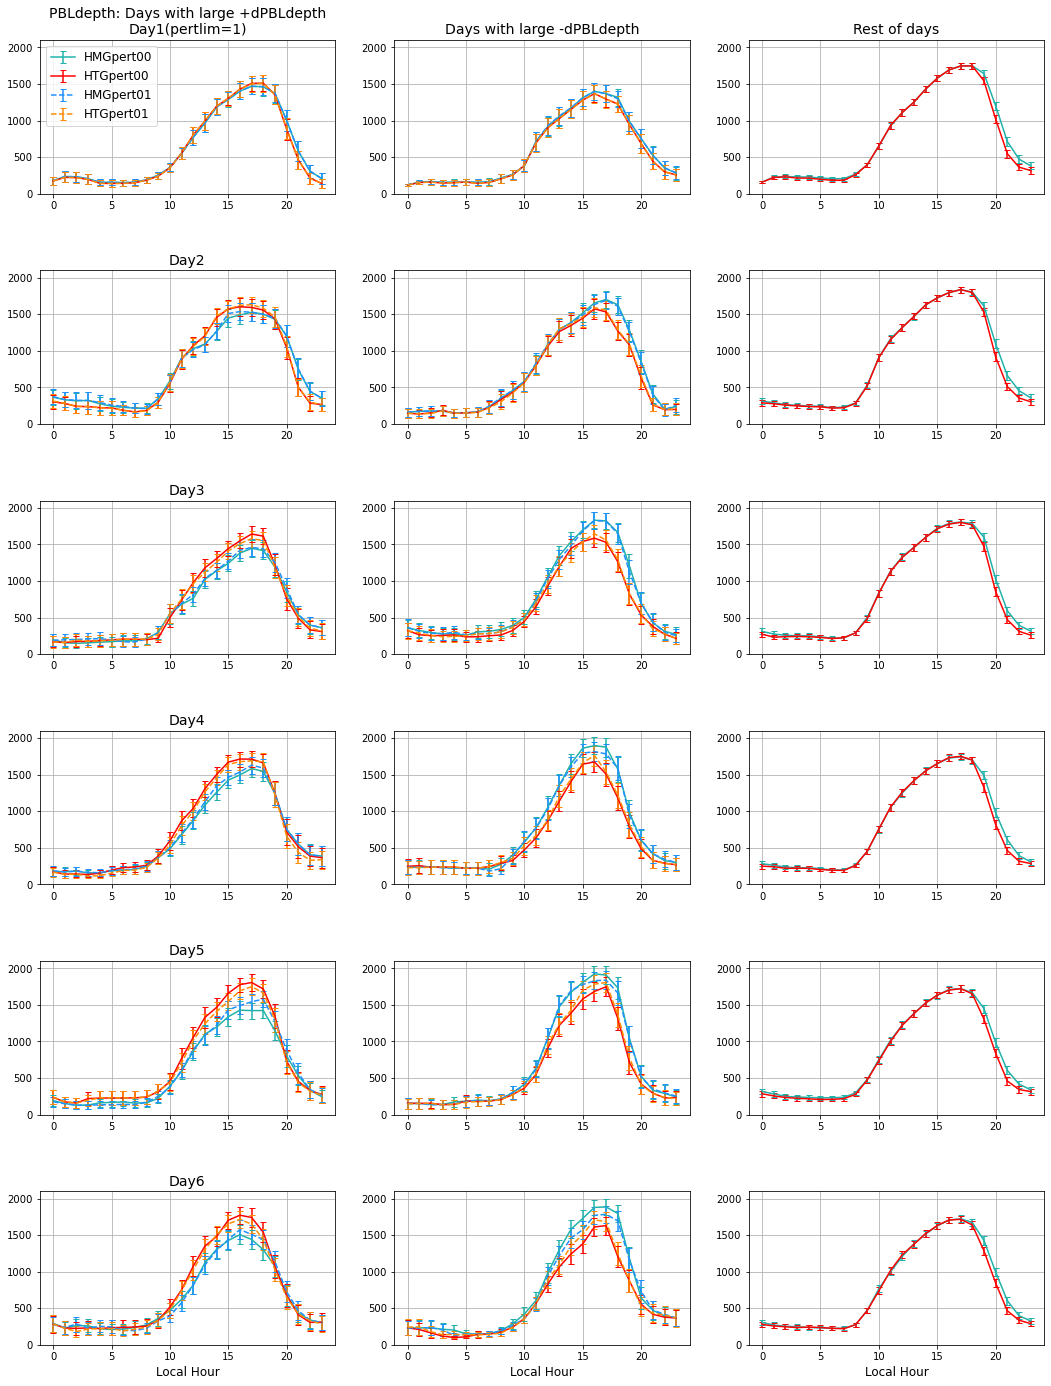

In [69]:
plotDiurnalCycles('PBLdepth', None, 2100, 0)
# plotDiurnalCycles('QREFHT', None, None, None)

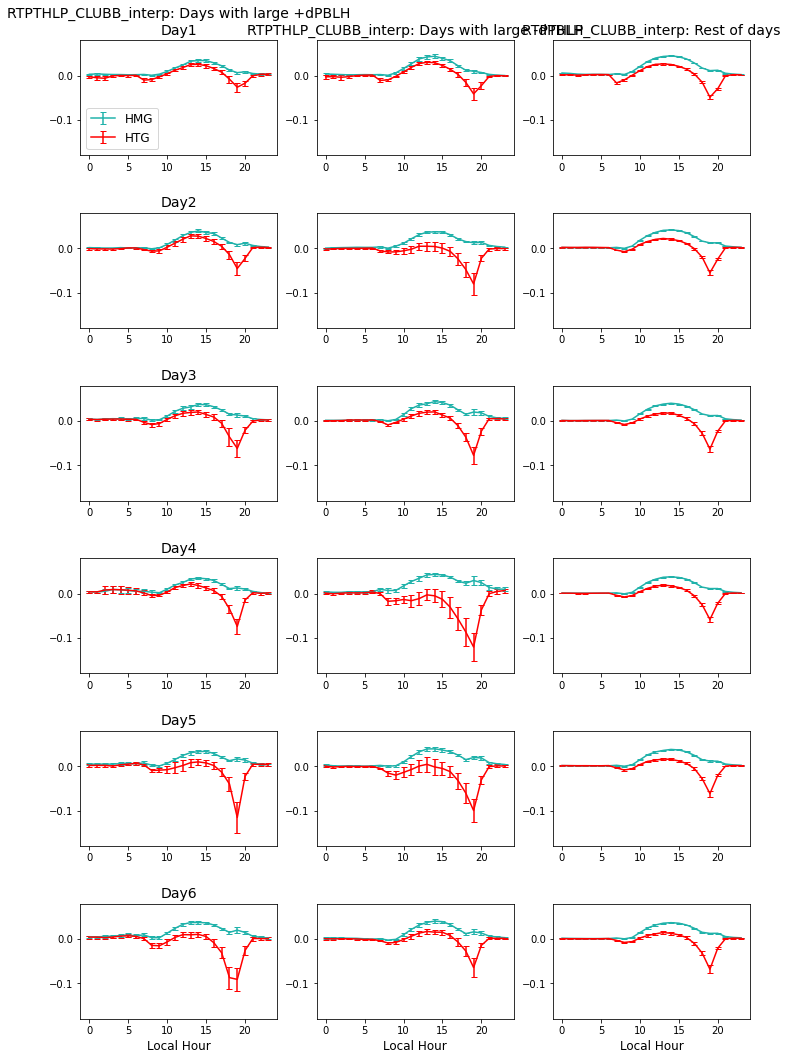

In [96]:
plotDiurnalCycles('RTPTHLP_CLUBB_interp', -1, 0.08, -0.18)


### Vertical Profiles

In [70]:
def getFullDS_sensDays(hmgDS_allDays, htgDS_allDays, 
                       hmgDS_dayMean, htgDS_dayMean,
                       strDates, listHigh, listLow): 
    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -  
    ## Get full arrays that match low/high percentiles

    allIndicies        = np.arange(0,len(strDates))
    restOfIndices_real = list(set(allIndicies) - set(listHigh) - set(listLow))
                              
    # HMG case
    highPct_HMG    = getTimes_basedOnDates(hmgDS_allDays,     
                                           hmgDS_dayMean.isel(year_month_day=listHigh))
    lowPct_HMG     = getTimes_basedOnDates(hmgDS_allDays,     
                                           hmgDS_dayMean.isel(year_month_day=listLow))
    restOfDays_HMG = getTimes_basedOnDates(hmgDS_allDays,     
                                           hmgDS_dayMean.isel(year_month_day=restOfIndices_real))

    # HTG case
    highPct_HTG    = getTimes_basedOnDates(htgDS_allDays,     
                                           htgDS_dayMean.isel(year_month_day=listHigh))
    lowPct_HTG     = getTimes_basedOnDates(htgDS_allDays,     
                                           htgDS_dayMean.isel(year_month_day=listLow))
    restOfDays_HTG = getTimes_basedOnDates(htgDS_allDays,     
                                           htgDS_dayMean.isel(year_month_day=restOfIndices_real))

    
    print('Done isolating high/low/rest DS')
    
    return highPct_HMG,lowPct_HMG,restOfDays_HMG, highPct_HTG,lowPct_HTG,restOfDays_HTG
    

In [71]:
## Get diurnal cycles for high/low days based on days after intializiation 
highHMG_day1,lowHMG_day1,restHMG_day1, highHTG_day1,lowHTG_day1,restHTG_day1 = getFullDS_sensDays(hmg_day1_upsample, 
                                                             htg_day1_upsample, 
                                                             selvarHMG_day1, selvarHTG_day1,
                                                             strDates_day1, listHigh_day1, listLow_day1)

highHMG_day2,lowHMG_day2,restHMG_day2, highHTG_day2,lowHTG_day2,restHTG_day2 = getFullDS_sensDays(hmg_day2_upsample, 
                                                             htg_day2_upsample, 
                                                             selvarHMG_day2, selvarHTG_day2,
                                                             strDates_day2, listHigh_day2, listLow_day2)

highHMG_day3,lowHMG_day3,restHMG_day3, highHTG_day3,lowHTG_day3,restHTG_day3 = getFullDS_sensDays(hmg_day3_upsample, 
                                                             htg_day3_upsample, 
                                                             selvarHMG_day3, selvarHTG_day3,
                                                             strDates_day3, listHigh_day3, listLow_day3)

highHMG_day4,lowHMG_day4,restHMG_day4, highHTG_day4,lowHTG_day4,restHTG_day4 = getFullDS_sensDays(hmg_day4_upsample, 
                                                             htg_day4_upsample, 
                                                             selvarHMG_day4, selvarHTG_day4,
                                                             strDates_day4, listHigh_day4, listLow_day4)

highHMG_day5,lowHMG_day5,restHMG_day5, highHTG_day5,lowHTG_day5,restHTG_day5 = getFullDS_sensDays(hmg_day5_upsample, 
                                                             htg_day5_upsample, 
                                                             selvarHMG_day5, selvarHTG_day5,
                                                             strDates_day5, listHigh_day5, listLow_day5)

highHMG_day6,lowHMG_day6,restHMG_day6, highHTG_day6,lowHTG_day6,restHTG_day6 = getFullDS_sensDays(hmg_day6_upsample, 
                                                             htg_day6_upsample, 
                                                             selvarHMG_day6, selvarHTG_day6,
                                                             strDates_day6, listHigh_day6, listLow_day6)



Done isolating high/low/rest DS
Done isolating high/low/rest DS
Done isolating high/low/rest DS
Done isolating high/low/rest DS
Done isolating high/low/rest DS
Done isolating high/low/rest DS


In [80]:
'''
Give this plotting routine the hourly mean DS' of high/low percentile filtering
'''
## Read in one file that has units on it (once you upsample, they disappear)

saveDir    = '/glade/work/mdfowler/CLASP/histData/processedData/'
realSfcHMG = pickle.load( open( saveDir+"realSfc_HMG_rtpthlponly_relaxTlongTau_freeSfcT.p" , "rb") )

def plotProfiles_meanOverHours(highPctDS_HMG, highPctDS_HTG,
                               lowPctDS_HMG, lowPctDS_HTG,
                               restOfDaysDS_HMG, restOfDaysDS_HTG,
                               varSelPlot,
                               startHr,endHr,
                               xMin, xMax, maxLev):
    
    caseNames = np.asarray(['HMG','HTG'])
    colorList = np.asarray(['lightseagreen','red'])

    ## Select which levels array to use
    if np.shape(highPctDS_HMG[varSelPlot].values)[2]==len(highPctDS_HMG.ilev.values):
        levSel = 'ilev'
    elif np.shape(highPctDS_HMG[varSelPlot].values)[2]==len(highPctDS_HMG.lev.values):
        levSel = 'lev'
    elif np.shape(highPctDS_HMG[varSelPlot].values)[2]==len(highPctDS_HMG.levInterp.values):
        levSel = 'levInterp'
        
                            
    ## First, get means (& std) over the selected hours and ens cases
    iTimeSel_high = np.where((highPctDS_HMG["time.hour"].values>=startHr) & 
                             (highPctDS_HMG["time.hour"].values<=endHr))[0]
    iTimeSel_low  = np.where((lowPctDS_HMG["time.hour"].values>=startHr) & 
                             (lowPctDS_HMG["time.hour"].values<=endHr))[0]
    iTimeSel_rest = np.where((restOfDaysDS_HMG["time.hour"].values>=startHr) & 
                             (restOfDaysDS_HMG["time.hour"].values<=endHr))[0]
    
    
    hourlyMean_highTimeSel_HMG   = highPctDS_HMG.isel(time=iTimeSel_high,pertlim=0).mean(dim=["time"])
    hourlyMean_lowTimeSel_HMG    = lowPctDS_HMG.isel(time=iTimeSel_low,pertlim=0).mean(dim=["time"])
    hourlyMean_restTimeSel_HMG   = restOfDaysDS_HMG.isel(time=iTimeSel_rest,pertlim=0).mean(dim=["time"])
    
    hourlyStd_highTimeSel_HMG   = highPctDS_HMG.isel(time=iTimeSel_high,pertlim=0).std(dim=["time"])
    hourlyStd_lowTimeSel_HMG    = lowPctDS_HMG.isel(time=iTimeSel_low,pertlim=0).std(dim=["time"])
    hourlyStd_restTimeSel_HMG   = restOfDaysDS_HMG.isel(time=iTimeSel_rest,pertlim=0).std(dim=["time"])
    
    
    hourlyMean_highTimeSel_HTG   = highPctDS_HTG.isel(time=iTimeSel_high,pertlim=0).mean(dim=["time"])
    hourlyMean_lowTimeSel_HTG    = lowPctDS_HTG.isel(time=iTimeSel_low,pertlim=0).mean(dim=["time"])
    hourlyMean_restTimeSel_HTG   = restOfDaysDS_HTG.isel(time=iTimeSel_rest,pertlim=0).mean(dim=["time"])
    
    hourlyStd_highTimeSel_HTG   = highPctDS_HTG.isel(time=iTimeSel_high,pertlim=0).std(dim=["time"])
    hourlyStd_lowTimeSel_HTG    = lowPctDS_HTG.isel(time=iTimeSel_low,pertlim=0).std(dim=["time"])
    hourlyStd_restTimeSel_HTG   = restOfDaysDS_HTG.isel(time=iTimeSel_rest,pertlim=0).std(dim=["time"])
    
    
    # Select the requested variable
    HMGvar_high   = np.squeeze(hourlyMean_highTimeSel_HMG[varSelPlot].values)
    HMGvar_low    = np.squeeze(hourlyMean_lowTimeSel_HMG[varSelPlot].values)
    HMGvar_rest   = np.squeeze(hourlyMean_restTimeSel_HMG[varSelPlot].values)

    HTGvar_high   = np.squeeze(hourlyMean_highTimeSel_HTG[varSelPlot].values)
    HTGvar_low    = np.squeeze(hourlyMean_lowTimeSel_HTG[varSelPlot].values)
    HTGvar_rest   = np.squeeze(hourlyMean_restTimeSel_HTG[varSelPlot].values)


    # Also get the std of that variable... 
    HMGvarStd_high   = np.squeeze(hourlyStd_highTimeSel_HMG[varSelPlot].values)
    HMGvarStd_low    = np.squeeze(hourlyStd_lowTimeSel_HMG[varSelPlot].values)
    HMGvarStd_rest   = np.squeeze(hourlyStd_restTimeSel_HMG[varSelPlot].values)

    HTGvarStd_high   = np.squeeze(hourlyStd_highTimeSel_HTG[varSelPlot].values)
    HTGvarStd_low    = np.squeeze(hourlyStd_lowTimeSel_HTG[varSelPlot].values)
    HTGvarStd_rest   = np.squeeze(hourlyStd_restTimeSel_HTG[varSelPlot].values)
    
 
    ## Set up figure
    fig,axs = plt.subplots(1,3, figsize=(15,5))
    axs     = axs.ravel()
    fig.subplots_adjust(hspace=0.2)

    atmLevs = highPctDS_HMG[levSel].values

    ## Define confidence level to rely on
    # CIlevel = 1.960   ## 95% CI
    CIlevel = 1.645   ## 90% CI

    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -
    ## Plot profiles
    axs[0].errorbar(HMGvar_high,   atmLevs,
                    xerr=CIlevel*(HMGvarStd_high/np.sqrt(len(iTimeSel_high))),
                    capsize=3, color=colorList[0], label=caseNames[0])
    axs[0].errorbar(HTGvar_high,   atmLevs, 
                    xerr=CIlevel*(HTGvarStd_high/np.sqrt(len(iTimeSel_high))),
                    capsize=3, color=colorList[1], label=caseNames[1])
    axs[0].legend(fontsize=12)

    
    axs[1].errorbar(HMGvar_low,   atmLevs, 
                    xerr=CIlevel*(HMGvarStd_low/np.sqrt(len(iTimeSel_low))),
                    capsize=3, color=colorList[0], label=caseNames[0])
    axs[1].errorbar(HTGvar_low,   atmLevs,
                    xerr=CIlevel*(HTGvarStd_low/np.sqrt(len(iTimeSel_low))),
                    capsize=3, color=colorList[1], label=caseNames[1])

                     
                     
    axs[2].errorbar(HMGvar_rest,   atmLevs,
                    xerr=CIlevel*(HMGvarStd_rest/np.sqrt(len(iTimeSel_rest))),
                    capsize=3, color=colorList[0], label=caseNames[0])
    axs[2].errorbar(HTGvar_rest,   atmLevs, 
                    xerr=CIlevel*(HTGvarStd_rest/np.sqrt(len(iTimeSel_rest))),
                    capsize=3, color=colorList[1], label=caseNames[1])

    

    ## - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # Other plot options
    axs[0].invert_yaxis()
    axs[1].invert_yaxis()
    axs[2].invert_yaxis()

    axs[0].set_ylim([980, maxLev])
    axs[1].set_ylim([980, maxLev])
    axs[2].set_ylim([980, maxLev])
    
    axs[0].set_xlim([xMin, xMax])
    axs[1].set_xlim([xMin, xMax])
    axs[2].set_xlim([xMin, xMax])
    
    axs[1].axes.yaxis.set_ticklabels([])
    axs[2].axes.yaxis.set_ticklabels([])   

    axs[0].set_title(varSelPlot+'\n Large increases in '+varSel, fontsize=16)       
    axs[1].set_title('Large decreases in '+varSel, fontsize=16)
    axs[2].set_title('Remaining days', fontsize=16)

    axs[0].set_xlabel(realSfcHMG[varSelPlot].units, fontsize=12)
    axs[1].set_xlabel(realSfcHMG[varSelPlot].units, fontsize=12)
    axs[2].set_xlabel(realSfcHMG[varSelPlot].units, fontsize=12)
    
    if varSelPlot.endswith('_interp'):
        axs[0].set_ylabel('hPa', fontsize=12)
    else:
        axs[0].set_ylabel('hPa (model hybrid coord)', fontsize=12)

    axs[0].tick_params(axis='both', labelsize= 12)
    axs[1].tick_params(axis='both', labelsize= 12)
    axs[2].tick_params(axis='both', labelsize= 12)

    return

In [88]:
## Which variable do we want to plot?

# varSelPlot = 'THLP2_CLUBB_interp'
# xminPlot   = 0 
# xmaxPlot   = 0.08

# varSelPlot = 'RTP2_CLUBB_interp'
# xminPlot   = 0.0
# xmaxPlot   = 0.18

varSelPlot = 'WP2_CLUBB_interp'
xminPlot   = 0.0
xmaxPlot   = 1.0


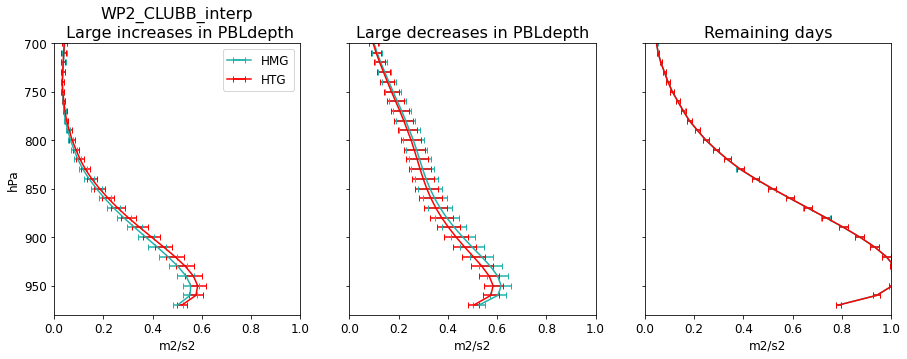

In [89]:
## Plot day1 
plotProfiles_meanOverHours(highHMG_day2, highHTG_day2, 
                           lowHMG_day2,  lowHTG_day2,
                           restHMG_day2, restHTG_day2,
                           varSelPlot,
                           12, 18,  # Start hr, end hr
                           xminPlot,       # Min x value
                           xmaxPlot,     # Max x value
                           700)     # Max level 

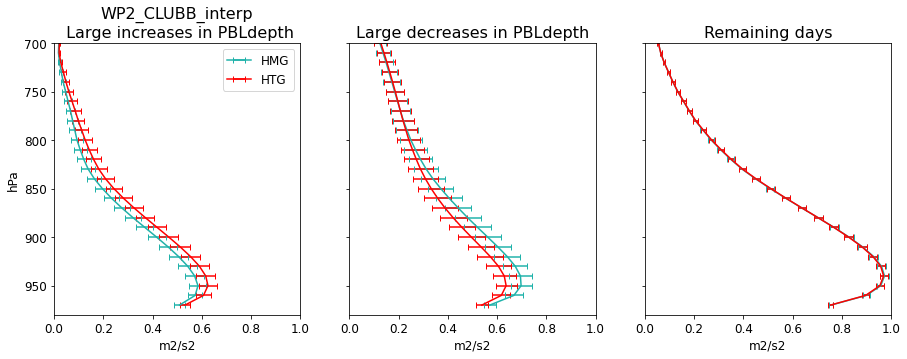

In [90]:
## Plot day 3
plotProfiles_meanOverHours(highHMG_day3, highHTG_day3, 
                           lowHMG_day3,  lowHTG_day3,
                           restHMG_day3, restHTG_day3,
                           varSelPlot,
                           12, 18,  # Start hr, end hr
                           xminPlot,       # Min x value
                           xmaxPlot,     # Max x value
                           700)     # Max level 


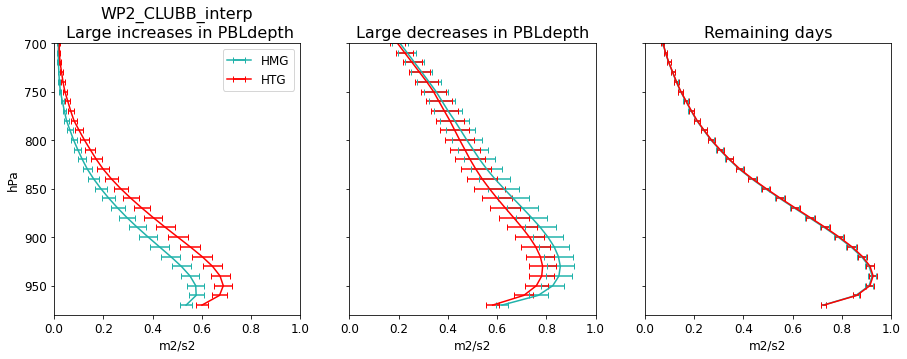

In [91]:
## Plot day 5
plotProfiles_meanOverHours(highHMG_day4, highHTG_day4, 
                           lowHMG_day4,  lowHTG_day4,
                           restHMG_day4, restHTG_day4,
                           varSelPlot,
                           12, 18,  # Start hr, end hr
                           xminPlot,       # Min x value
                           xmaxPlot,     # Max x value
                           700)     # Max level 

## Try looking at distributions?

In [45]:
# Plot afternoon means of a selected variable 

# plotVar = 'PBLH'
# unitsStr = 'PBLH [m]'

plotVar = 'RTPTHLP_CLUBB_interp'

startHr_plt = 12
endHr_plt   = 18

## To start: compute average over selected hours for each day lead time
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

real_varHMG_day1,real_varHTG_day1,diffHTG_day1 = meanVars_overHours(hmg_day1_upsample, 
                                                                    htg_day1_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day2,real_varHTG_day2,diffHTG_day2 = meanVars_overHours(hmg_day2_upsample, 
                                                                    htg_day2_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day3,real_varHTG_day3,diffHTG_day3 = meanVars_overHours(hmg_day3_upsample, 
                                                                    htg_day3_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day4,real_varHTG_day4,diffHTG_day4 = meanVars_overHours(hmg_day4_upsample, 
                                                                    htg_day4_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day5,real_varHTG_day5,diffHTG_day5 = meanVars_overHours(hmg_day5_upsample, 
                                                                    htg_day5_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day6,real_varHTG_day6,diffHTG_day6 = meanVars_overHours(hmg_day6_upsample, 
                                                                    htg_day6_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)





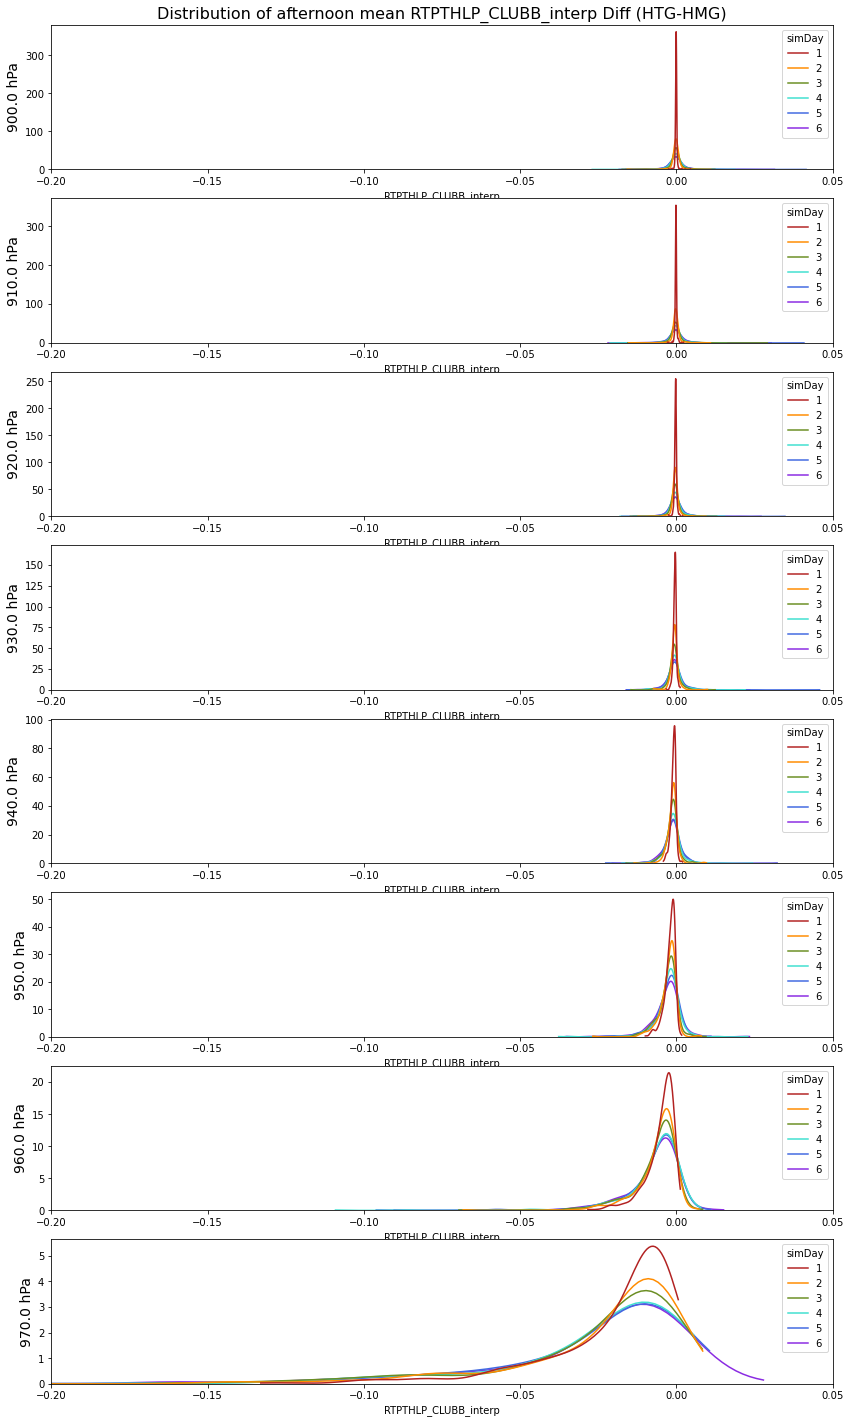

In [47]:
nLevPlot = 8
totlLevs = len(diffHTG_day1.levInterp.values)

fig,axs = plt.subplots(nLevPlot,1, figsize=(14,25) )
axs     = axs.ravel()

axs[0].set_title('Distribution of afternoon mean '+plotVar+' Diff (HTG-HMG)',fontsize=16)

for iLevSel in range(nLevPlot):
    df = pd.concat(axis=0, ignore_index=True, objs=[
         pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day1.values)[0,:,-nLevPlot+iLevSel],   'simDay': 1}), 
         pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day2.values)[0,:,-nLevPlot+iLevSel],   'simDay': 2}),
         pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day3.values)[0,:,-nLevPlot+iLevSel],   'simDay': 3}),
         pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day4.values)[0,:,-nLevPlot+iLevSel],   'simDay': 4}),
         pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day5.values)[0,:,-nLevPlot+iLevSel],   'simDay': 5}),
         pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day6.values)[0,:,-nLevPlot+iLevSel],   'simDay': 6}), 
        ])

    ## if including day1: palette=['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet']
    sns.kdeplot(data=df, x=plotVar, hue="simDay", ax=axs[iLevSel], cut=0, log_scale=False,
                palette=['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet'])

    axs[iLevSel].set_ylabel(str(diffHTG_day1.levInterp.values[-nLevPlot+iLevSel])+' hPa',fontsize=14)

    # axs[iLevSel].set_xlim([1e-6, 2])
    axs[iLevSel].set_xlim([-0.2, 0.05])


Mean values (avg over hr 12 - 18) of PBLdepth
          HMG       HTG        Diff
Day1:  1450.1567 1448.5788   -1.5779
Day2:  1602.8840 1603.0070    0.1230
Day3:  1589.4712 1579.7676   -9.7037
Day4:  1556.8296 1549.8185   -7.0110
Day5:  1534.3362 1534.6254    0.2892
Day6:  1520.0604 1513.9580   -6.1024


(-1000.0, 1000.0)

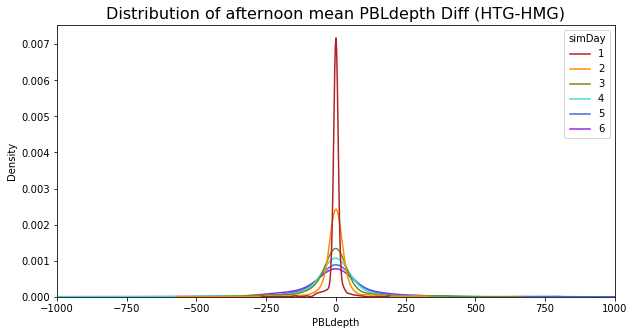

In [14]:
## 1-D atm variables?
# Plot afternoon means of a selected variable 


plotVar = 'PBLdepth'

startHr_plt = 12
endHr_plt   = 18

## To start: compute average over selected hours for each day lead time
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

real_varHMG_day1,real_varHTG_day1,diffHTG_day1 = meanVars_overHours(hmg_day1_upsample, 
                                                                    htg_day1_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day2,real_varHTG_day2,diffHTG_day2 = meanVars_overHours(hmg_day2_upsample, 
                                                                    htg_day2_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day3,real_varHTG_day3,diffHTG_day3 = meanVars_overHours(hmg_day3_upsample, 
                                                                    htg_day3_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day4,real_varHTG_day4,diffHTG_day4 = meanVars_overHours(hmg_day4_upsample, 
                                                                    htg_day4_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day5,real_varHTG_day5,diffHTG_day5 = meanVars_overHours(hmg_day5_upsample, 
                                                                    htg_day5_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day6,real_varHTG_day6,diffHTG_day6 = meanVars_overHours(hmg_day6_upsample, 
                                                                    htg_day6_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)


print('Mean values (avg over hr %i - %i) of %s' % (startHr_plt, endHr_plt, plotVar))
print('          HMG       HTG        Diff')
print('Day1:  %8.4f %9.4f %9.4f' % (np.nanmean(real_varHMG_day1), np.nanmean(real_varHTG_day1), np.nanmean(diffHTG_day1) ) )
print('Day2:  %8.4f %9.4f %9.4f' % (np.nanmean(real_varHMG_day2), np.nanmean(real_varHTG_day2), np.nanmean(diffHTG_day2) ) )
print('Day3:  %8.4f %9.4f %9.4f' % (np.nanmean(real_varHMG_day3), np.nanmean(real_varHTG_day3), np.nanmean(diffHTG_day3) ) )
print('Day4:  %8.4f %9.4f %9.4f' % (np.nanmean(real_varHMG_day4), np.nanmean(real_varHTG_day4), np.nanmean(diffHTG_day4) ) )
print('Day5:  %8.4f %9.4f %9.4f' % (np.nanmean(real_varHMG_day5), np.nanmean(real_varHTG_day5), np.nanmean(diffHTG_day5) ) )
print('Day6:  %8.4f %9.4f %9.4f' % (np.nanmean(real_varHMG_day6), np.nanmean(real_varHTG_day6), np.nanmean(diffHTG_day6) ) )



## Make the plot 

fig,axs = plt.subplots(1,1, figsize=(10,5) )

axs.set_title('Distribution of afternoon mean '+plotVar+' Diff (HTG-HMG)',fontsize=16)


df = pd.concat(axis=0, ignore_index=True, objs=[
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day1.values)[0,:],   'simDay': 1}), 
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day2.values)[0,:],   'simDay': 2}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day3.values)[0,:],   'simDay': 3}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day4.values)[0,:],   'simDay': 4}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day5.values)[0,:],   'simDay': 5}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day6.values)[0,:],   'simDay': 6}), 
    ])

## if including day1: palette=['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet']
sns.kdeplot(data=df, x=plotVar, hue="simDay", ax=axs, cut=0, log_scale=False,
            palette=['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet'])

axs.set_xlim([-1000,1000])

(-1000.0, 1000.0)

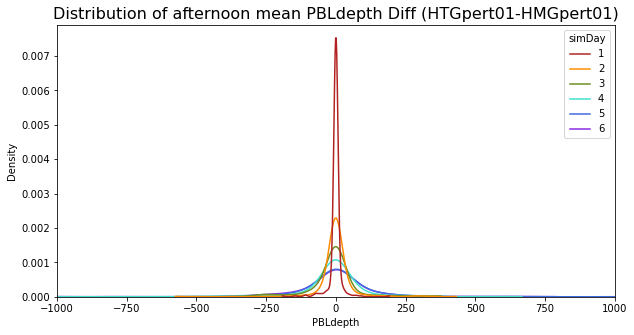

In [15]:
fig,axs = plt.subplots(1,1, figsize=(10,5) )

axs.set_title('Distribution of afternoon mean '+plotVar+' Diff (HTGpert01-HMGpert01)',fontsize=16)


df = pd.concat(axis=0, ignore_index=True, objs=[
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day1.values)[1,:],   'simDay': 1}), 
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day2.values)[1,:],   'simDay': 2}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day3.values)[1,:],   'simDay': 3}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day4.values)[1,:],   'simDay': 4}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day5.values)[1,:],   'simDay': 5}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day6.values)[1,:],   'simDay': 6}), 
    ])

## if including day1: palette=['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet']
sns.kdeplot(data=df, x=plotVar, hue="simDay", ax=axs, cut=0, log_scale=False,
            palette=['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet'])

axs.set_xlim([-1000,1000])

<AxesSubplot:title={'center':'Distribution of afternoon mean PBLdepth Diff (HMGpert01-HMGpert00)'}, xlabel='PBLdepth', ylabel='Density'>

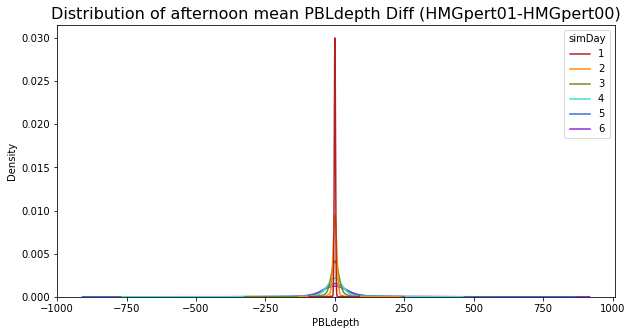

In [13]:
## 1-D atm variables?
# Plot afternoon means of a selected variable 


plotVar = 'PBLdepth'

startHr_plt = 12
endHr_plt   = 18

## To start: compute average over selected hours for each day lead time
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

real_varHMG_day1,real_varHTG_day1,diffHTG_day1 = meanVars_overHours(hmg_day1_upsample, 
                                                                    htg_day1_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day2,real_varHTG_day2,diffHTG_day2 = meanVars_overHours(hmg_day2_upsample, 
                                                                    htg_day2_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day3,real_varHTG_day3,diffHTG_day3 = meanVars_overHours(hmg_day3_upsample, 
                                                                    htg_day3_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day4,real_varHTG_day4,diffHTG_day4 = meanVars_overHours(hmg_day4_upsample, 
                                                                    htg_day4_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day5,real_varHTG_day5,diffHTG_day5 = meanVars_overHours(hmg_day5_upsample, 
                                                                    htg_day5_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day6,real_varHTG_day6,diffHTG_day6 = meanVars_overHours(hmg_day6_upsample, 
                                                                    htg_day6_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)


diffHMG_day1 = real_varHMG_day1.values[1,:]-real_varHMG_day1.values[0,:]
diffHMG_day2 = real_varHMG_day2.values[1,:]-real_varHMG_day2.values[0,:]
diffHMG_day3 = real_varHMG_day3.values[1,:]-real_varHMG_day3.values[0,:]
diffHMG_day4 = real_varHMG_day4.values[1,:]-real_varHMG_day4.values[0,:]
diffHMG_day5 = real_varHMG_day5.values[1,:]-real_varHMG_day5.values[0,:]
diffHMG_day6 = real_varHMG_day6.values[1,:]-real_varHMG_day6.values[0,:]


## Make the plot 

fig,axs = plt.subplots(1,1, figsize=(10,5) )

axs.set_title('Distribution of afternoon mean '+plotVar+' Diff (HMGpert01-HMGpert00)',fontsize=16)


df = pd.concat(axis=0, ignore_index=True, objs=[
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHMG_day1),   'simDay': 1}), 
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHMG_day2),   'simDay': 2}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHMG_day3),   'simDay': 3}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHMG_day4),   'simDay': 4}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHMG_day5),   'simDay': 5}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHMG_day6),   'simDay': 6}), 
    ])

## if including day1: palette=['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet']
sns.kdeplot(data=df, x=plotVar, hue="simDay", ax=axs, cut=0, log_scale=False,
            palette=['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet'])

# axs.set_xlim([-1000,1000])

Mean values (avg over hr 12 - 18) of TSOI_10CM
          HMG       HTG        Diff
Day1:  308.7175  308.7075   -0.0099
Day2:  309.0529  309.0533    0.0004
Day3:  309.1280  309.0978   -0.0301
Day4:  309.0870  309.1479    0.0609
Day5:  309.1212  309.1697    0.0485
Day6:  309.1473  309.1993    0.0520


TypeError: 'AxesSubplot' object is not subscriptable

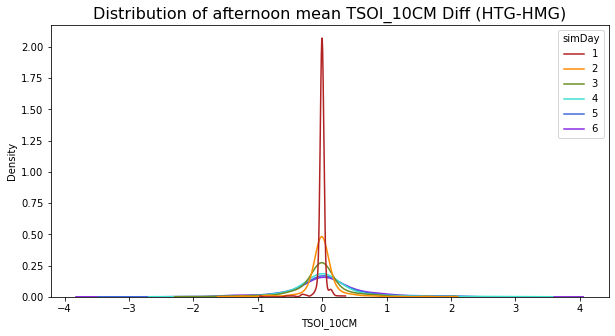

In [59]:
## Sfc land variable?
# Plot afternoon means of a selected variable 


plotVar = 'TSOI_10CM'
# plotVar = 'SOILWATER_10CM'

startHr_plt = 12
endHr_plt   = 18

## To start: compute average over selected hours for each day lead time
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

real_varHMG_day1,real_varHTG_day1,diffHTG_day1 = meanVars_overHours(hmgCLM_day1_upsample, 
                                                                    htgCLM_day1_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day2,real_varHTG_day2,diffHTG_day2 = meanVars_overHours(hmgCLM_day2_upsample, 
                                                                    htgCLM_day2_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day3,real_varHTG_day3,diffHTG_day3 = meanVars_overHours(hmgCLM_day3_upsample, 
                                                                    htgCLM_day3_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day4,real_varHTG_day4,diffHTG_day4 = meanVars_overHours(hmgCLM_day4_upsample, 
                                                                    htgCLM_day4_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day5,real_varHTG_day5,diffHTG_day5 = meanVars_overHours(hmgCLM_day5_upsample, 
                                                                    htgCLM_day5_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)

real_varHMG_day6,real_varHTG_day6,diffHTG_day6 = meanVars_overHours(hmgCLM_day6_upsample, 
                                                                    htgCLM_day6_upsample, 
                                                                    plotVar, startHr_plt, endHr_plt)


print('Mean values (avg over hr %i - %i) of %s' % (startHr_plt, endHr_plt, plotVar))
print('          HMG       HTG        Diff')
print('Day1:  %8.4f %9.4f %9.4f' % (np.nanmean(real_varHMG_day1), np.nanmean(real_varHTG_day1), np.nanmean(diffHTG_day1) ) )
print('Day2:  %8.4f %9.4f %9.4f' % (np.nanmean(real_varHMG_day2), np.nanmean(real_varHTG_day2), np.nanmean(diffHTG_day2) ) )
print('Day3:  %8.4f %9.4f %9.4f' % (np.nanmean(real_varHMG_day3), np.nanmean(real_varHTG_day3), np.nanmean(diffHTG_day3) ) )
print('Day4:  %8.4f %9.4f %9.4f' % (np.nanmean(real_varHMG_day4), np.nanmean(real_varHTG_day4), np.nanmean(diffHTG_day4) ) )
print('Day5:  %8.4f %9.4f %9.4f' % (np.nanmean(real_varHMG_day5), np.nanmean(real_varHTG_day5), np.nanmean(diffHTG_day5) ) )
print('Day6:  %8.4f %9.4f %9.4f' % (np.nanmean(real_varHMG_day6), np.nanmean(real_varHTG_day6), np.nanmean(diffHTG_day6) ) )



## Make the plot 

fig,axs = plt.subplots(1,1, figsize=(10,5) )

axs.set_title('Distribution of afternoon mean '+plotVar+' Diff (HTG-HMG)',fontsize=16)


df = pd.concat(axis=0, ignore_index=True, objs=[
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day1.values)[0,:],   'simDay': 1}), 
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day2.values)[0,:],   'simDay': 2}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day3.values)[0,:],   'simDay': 3}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day4.values)[0,:],   'simDay': 4}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day5.values)[0,:],   'simDay': 5}),
     pd.DataFrame.from_dict({plotVar: np.squeeze(diffHTG_day6.values)[0,:],   'simDay': 6}), 
    ])

## if including day1: palette=['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet']
sns.kdeplot(data=df, x=plotVar, hue="simDay", ax=axs, cut=0, log_scale=False,
            palette=['firebrick','darkorange','olivedrab','turquoise','royalblue','blueviolet'])

axs[iLevSel].set_xlim([1e-6, 2])
axs.set_xlim([-0.2, 0.05])
